In [44]:
import pyemma
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import numpy as np
from glob import glob

In [4]:
pdb_file = '/Volumes/DATA/MSM_Zuckerman/2F4K/DESRES-Trajectory_2F4K-0-protein/2F4K-0-protein/villin.pdb'

In [5]:
traj_files = sorted(glob("/Volumes/DATA/MSM_Zuckerman/2F4K/DESRES-Trajectory_2F4K-0-protein/2F4K-0-protein/*.dcd"))

In [6]:
features = pyemma.coordinates.featurizer(pdb_file)
features.add_residue_mindist()
source = pyemma.coordinates.source([traj_files], features=features, chunk_size=10000)
X = source.get_output()

26-06-18 00:06:22 pyemma.coordinates.data.featurization.featurizer.MDFeaturizer[0] WARNING  Using all residue pairs with schemes like closest or closest-heavy is very time consuming. Consider reducing the residue pairs


<ipython-input-6-9a1506e8de43>:3: PyEMMA_DeprecationWarning: Passed deprecated argument "chunk_size", please use "chunksize"
  source = pyemma.coordinates.source([traj_files], features=features, chunk_size=10000)


HBox(children=(HBox(children=(Label(value='getting output of FragmentedTrajectoryReader'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=63), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [5]:
# top model is kinetic, tica lag 50 frames, 10 tics, 100 microstates, msm lag 50 frames

In [12]:
tica = pyemma.coordinates.tica(X, lag=50, dim=10, kinetic_map=True)

HBox(children=(HBox(children=(Label(value='calculate covariances'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=5), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [13]:
Y = tica.get_output()

HBox(children=(HBox(children=(Label(value='getting output of TICA'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=5), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [14]:
kmeans = pyemma.coordinates.cluster_kmeans(Y, k=100, max_iter=1000)

HBox(children=(HBox(children=(Label(value='initialize kmeans++ centers'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='kmeans iterations'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

26-06-18 00:21:55 pyemma.coordinates.clustering.kmeans.KmeansClustering[10] INFO     Cluster centers converged after 47 steps.


In [15]:
dtrajs = kmeans.dtrajs

In [16]:
np.save('dtrajs_villin_lag10ns', dtrajs)

In [131]:
dtrajs = list(np.load('dtrajs_villin_lag10ns.npy'))

In [5]:
its = pyemma.msm.its(dtrajs, 2000, errors='bayes')

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=19), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

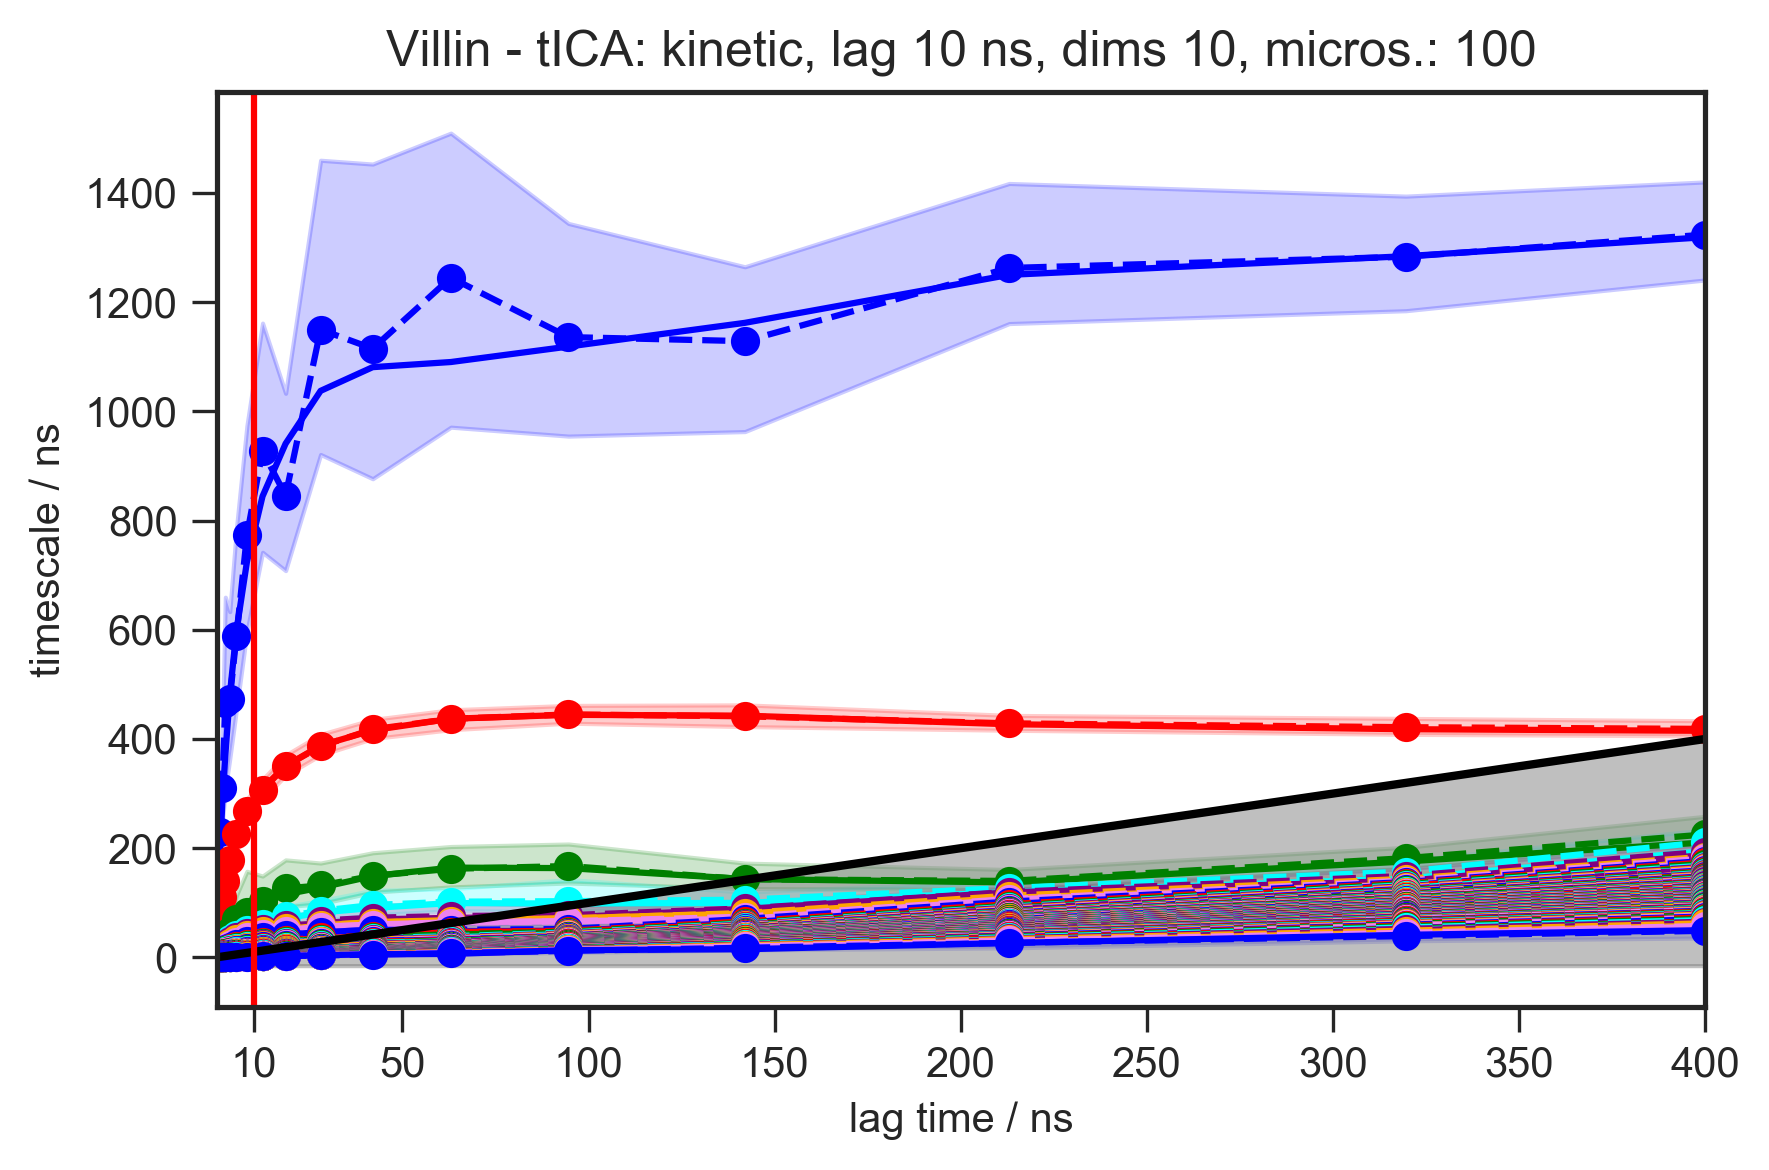

In [10]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, ylog=False, dt=0.2, units='ns')
plt.axvline(10, c='red')
plt.title('Villin - tICA: kinetic, lag 10 ns, dims 10, micros.: 100')
plt.xticks([10,50,100,150,200,250,300,350,400])
plt.tight_layout()
plt.savefig('villin_its.png', dpi=300)
plt.savefig('villin_its.pdf')

In [43]:
#bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 50)

In [44]:
# ck_test = bmsm.cktest(2, err_est=True)

In [45]:
# plt.figure()
# pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
# plt.tight_layout()
# plt.savefig('villin_cktest.png', dpi=300)
# plt.savefig('villin_cktest.pdf')

In [ ]:
# pass!

In [46]:
# ck_test_3 = bmsm.cktest(3, err_est=True)

In [47]:
# plt.figure()
# pyemma.plots.plot_cktest(ck_test_3, units='ns', dt=0.2)
# plt.tight_layout()
# plt.savefig('villin_cktest_3macro.png', dpi=300)
# plt.savefig('villin_cktest_3macro.pdf')

In [16]:
# let's see also 150 ns

In [48]:
# bmsm_ = pyemma.msm.bayesian_markov_model(dtrajs, 750)

In [49]:
# ck_test_ = bmsm_.cktest(2, err_est=True)

In [50]:
# plt.figure()
# pyemma.plots.plot_cktest(ck_test_, units='ns', dt=0.2)
# plt.tight_layout()
# plt.savefig('villin_cktest_lag150ns.png', dpi=300)
# plt.savefig('villin_cktest_lag150ns.pdf')

In [51]:
# ck_test_3_ = bmsm_.cktest(3, err_est=True)

In [52]:
# plt.figure()
# pyemma.plots.plot_cktest(ck_test_3_, units='ns', dt=0.2)
# plt.tight_layout()
# plt.savefig('villin_cktest_lag150ns_3macro.png', dpi=300)
# plt.savefig('villin_cktest_lag150ns_3macro.pdf')

In [10]:
# UPDATE: a) all CK plots should go out to the same maximum for comparison, b) let's look at 10ns, 50 ns and then every
# 50 ns until the lag time used in the Noe models

In [11]:
# lag 10 ns

In [12]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 50)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [13]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (150/10)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

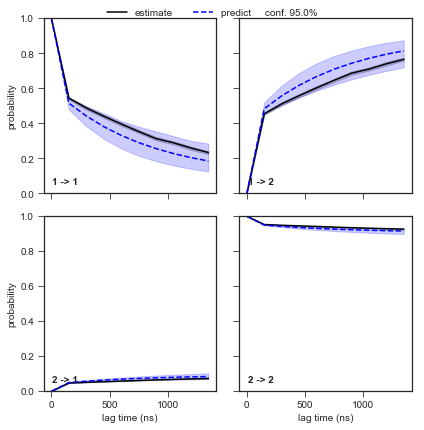

In [14]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('villin_cktest_lag10ns_outto1350ns.png', dpi=300)
plt.savefig('villin_cktest_lag10ns_outto1350ns.pdf')

In [15]:
# lag 50 ns

In [27]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 250)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [28]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (150/50)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

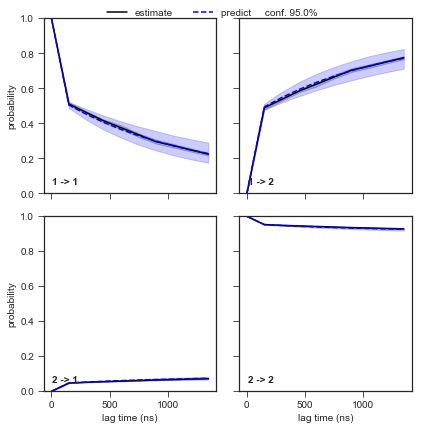

In [29]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('villin_cktest_lag50ns_outto1350ns.png', dpi=300)
plt.savefig('villin_cktest_lag50ns_outto1350ns.pdf')

In [19]:
# lag 100 ns

In [20]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 500)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [21]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (150/100)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

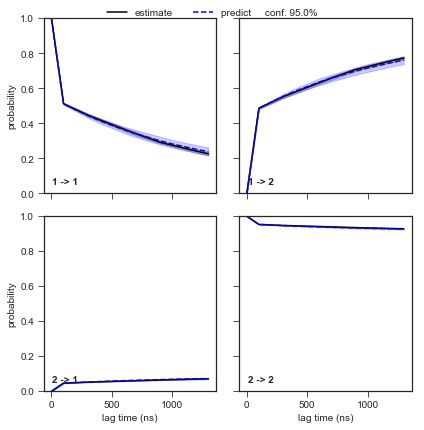

In [22]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('villin_cktest_lag100ns_outto1350ns.png', dpi=300)
plt.savefig('villin_cktest_lag100ns_outto1350ns.pdf')

In [23]:
# lag 150 ns

In [24]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 750)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [25]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (150/150)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

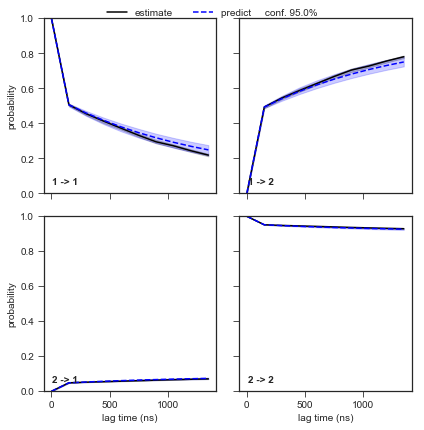

In [26]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('villin_cktest_lag150ns_outto1350ns.png', dpi=300)
plt.savefig('villin_cktest_lag150ns_outto1350ns.pdf')

In [69]:
# CK-test using 3 macrostates

In [70]:
# lag 10 ns

In [72]:
ck_test = bmsm.cktest(3, err_est=True, mlags=(np.arange(10) * (150/10)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

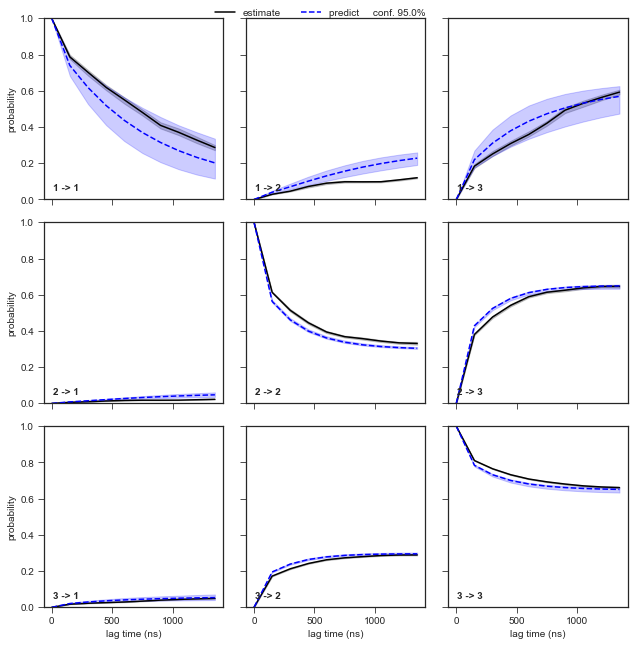

In [73]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('villin_cktest_lag10ns_3states_outto1350ns.png', dpi=300)
plt.savefig('villin_cktest_lag10ns_3states_outto1350ns.pdf')

In [74]:
# lag 50 ns

In [79]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 250)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [80]:
ck_test = bmsm.cktest(3, err_est=True, mlags=(np.arange(10) * (150/50)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

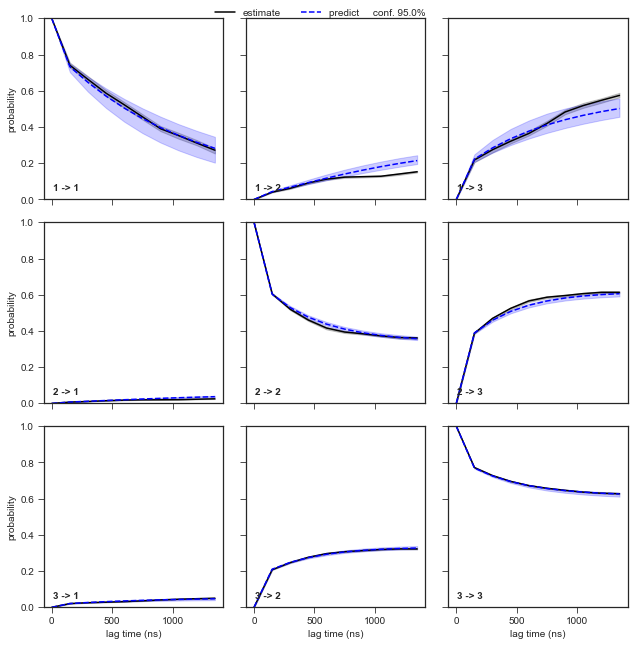

In [81]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('villin_cktest_lag50ns_outto1350ns_3states.png', dpi=300)
plt.savefig('villin_cktest_lag50ns_outto1350ns_3states.pdf')

In [78]:
# lag 100 ns

In [82]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 500)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [83]:
ck_test = bmsm.cktest(3, err_est=True, mlags=(np.arange(10) * (150/100)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

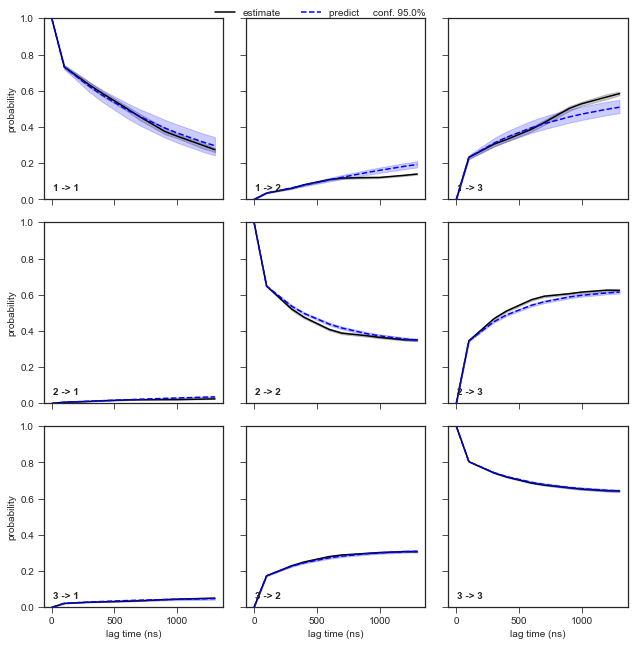

In [84]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('villin_cktest_lag100ns_outto1350ns_3states.png', dpi=300)
plt.savefig('villin_cktest_lag100ns_outto1350ns_3states.pdf')

In [85]:
# lag 150 ns

In [86]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 750)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [87]:
ck_test = bmsm.cktest(3, err_est=True, mlags=(np.arange(10) * (150/150)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

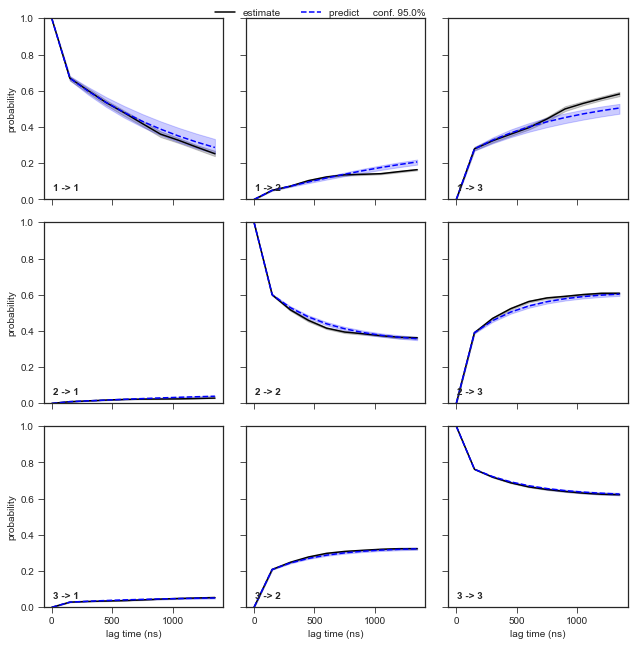

In [88]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('villin_cktest_lag150ns_outto1350ns_3states.png', dpi=300)
plt.savefig('villin_cktest_lag150ns_outto1350ns_3states.pdf')

In [1]:
# 2 eigen model

In [2]:
# top model is commute, tica lag 50 frames, 2 tics, 50 microstates, msm lag 50 frames

In [7]:
tica = pyemma.coordinates.tica(X, lag=50, dim=2, kinetic_map=False, commute_map=True)

HBox(children=(HBox(children=(Label(value='calculate covariances'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=5), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [8]:
Y = tica.get_output()

HBox(children=(HBox(children=(Label(value='getting output of TICA'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=5), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [9]:
kmeans = pyemma.coordinates.cluster_kmeans(Y, k=50, max_iter=1000)

HBox(children=(HBox(children=(Label(value='initialize kmeans++ centers'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=50), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='kmeans iterations'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

26-06-18 00:18:04 pyemma.coordinates.clustering.kmeans.KmeansClustering[5] INFO     Cluster centers converged after 48 steps.


In [10]:
dtrajs = kmeans.dtrajs

In [11]:
np.save('dtrajs_villin_lag10ns_2eigen', dtrajs)

In [30]:
dtrajs = list(np.load('dtrajs_villin_lag10ns_2eigen.npy'))

In [10]:
its_2eigen = pyemma.msm.its(dtrajs, 2000, errors='bayes')

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=19), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

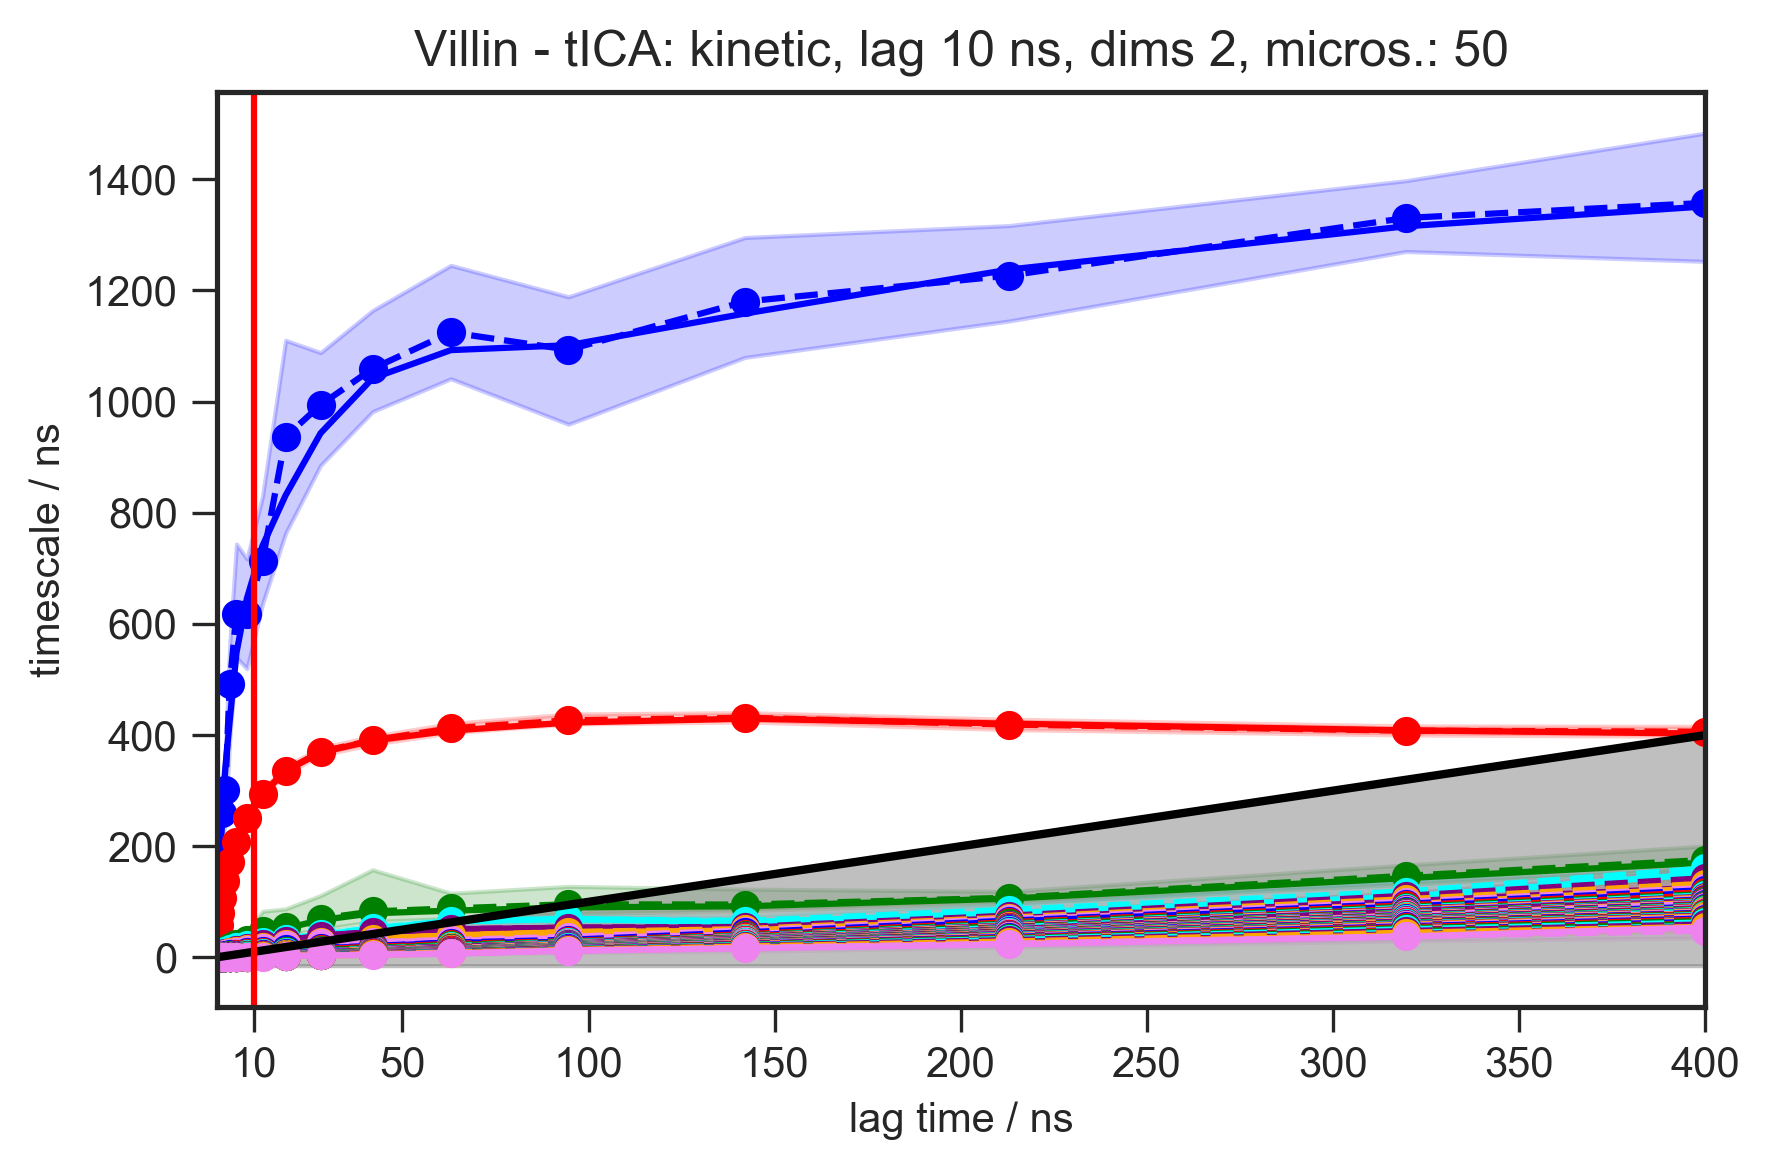

In [53]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its_2eigen, ylog=False, dt=0.2, units='ns')
plt.axvline(10, c='red')
plt.title('Villin - tICA: kinetic, lag 10 ns, dims 2, micros.: 50')
plt.xticks([10,50,100,150,200,250,300,350,400])
plt.tight_layout()
plt.savefig('villin_its_2eigen.png', dpi=300)
plt.savefig('villin_its_2eigen.pdf')

In [12]:
import numpy as _np
from pyemma.util.types import  is_iterable_of_int as _is_iterable_of_int, is_int as _is_int

def plot_implied_timescales(ITS, ax=None, outfile=None, show_mle=True, show_mean=True,
                            xlog=False, ylog=True, confidence=0.95, refs=None, nits=-1,
                            process=None, units='steps', dt=1., colors = ['blue'], **kwargs):
    r"""Implied timescale plot
    Parameters
    ----------
    ITS : implied timescales object.
        Object whose data will be plotted. Must provide the functions: get_timescales() and get_timescales(i) where i is the
        the property samples_available
    ax : matplotlib Axes object, optional, default = None
        the axes to plot to. When set to None the default Axes object will be used.
    outfile : str, optional, default = None
        output file to write the figure to. When not given, the plot will be displayed
    show_mean : bool, default = True
        Line for mean value will be shown, if available
    show_mle : bool, default = True
        Line for maximum likelihood estimate will be shown
    xlog : bool, optional, default = False
        Iff true, the x-Axis is logarithmized
    ylog : bool, optional, default = True
        Iff true, the y-Axis is logarithmized
    confidence : float, optional, default = 0.95
        The confidence interval for plotting error bars (if available)
    refs : ndarray((m), dtype=float), optional, default = None
        Reference (exact solution or other reference) timescales if known. The number of timescales must match those
        in the ITS object
    nits: integer, default = -1
        Number of implied timescales to be shown. The default behaviour (-1) is to show all timescales available.
        :py:obj:`nits` != -1 and :py:obj:`process` != None are mutually exclusive
    process : iterable of integers, default is None
        list or ndarray((m), dtype=int) containing a list of the processes to be shown. The default behaviour is
        to show all timescales available.
        :py:obj:`process` != None and :py:obj:`nits` != -1 are mutually exclusive
    units: str or list (len=2) of strings, optional, default = 'steps'
        Affects the labeling of the axes. Used with :py:obj:`dt`, allows for changing the physical units of the axes.
        Accepts simple LaTeX math strings, eg. '$\mu$s'
        If this parameter is a list, it will be assumed that units[0] is for the x-axis and units[1] for the y-axis.
    dt: float or list(len=2) of floats, optional, default = 1.0
        Physical time between frames, expressed the units given in :py:obj:`units`. E.g, if you know that each
        frame corresponds to .010 ns, you can use the combination of parameters :py:obj:`dt` =0.01,
        :py:obj:`units` ='ns' to display the implied timescales in ns (instead of frames)
        If this parameter is a list, it will be assumed that dt[0] is for the x-axis and dt[1] for the y-axis.
    **kwargs: Will be passed to pyplot.plot when plotting the MLE datapoints (not the bootstrapped means).
            See the doc of pyplot for more options. Most useful lineproperties like `marker='o'` and/or :markersize=5
    Returns
    -------
    ax : Axes object containing the plot
    """
    import matplotlib.pyplot as _plt
    # check input
    if ax is None:
        ax = _plt.gca()
    #colors = ['blue', 'red', 'green', 'cyan', 'purple', 'orange', 'violet']
    lags = ITS.lagtimes
    xmax = _np.max(lags)
    srt = _np.argsort(lags)
    # Check the processes to be shown
    if process is not None:
        if nits != -1:
            raise TypeError(
                'optional arguments nits and process are mutually exclusive:', nits, proceasss)
        if not _is_iterable_of_int(process):
            raise ValueError('process has to be an iterable of integers')
        if _np.max(process)+1 > ITS.number_of_timescales:
            raise ValueError(
                'requested process %u, whereas ITS only contains %u timescales' % (
                    _np.max(process), ITS.number_of_timescales))
        # Now that it's for sure that nits==-1, process is iter_of_ints, and the requested processes exist in its object:
        its_idx = process
    else:
        if not _is_int(nits):
            raise TypeError('nits is not an integer, ',nits)
        if nits == -1:
            nits = ITS.number_of_timescales
        its_idx = _np.arange(ITS.number_of_timescales)[:nits]
    # Check units and dt for user error.
    if isinstance(units, list) and len(units) != 2:
        raise TypeError("If units is a list, len(units) has to be = 2")
    if isinstance(dt, list) and len(dt) != 2:
        raise TypeError("If dt is a list, len(dt) has to be = 2")
    # Create list of units and dts for different axis
    if isinstance(units, str):
        units = [units] * 2
    if isinstance(dt, (float, int)):
        dt = [dt] * 2
    #ymin = min(_np.min(lags), _np.min(ITS.get_timescales()))
    #ymax = 1.5*_np.min(ITS.get_timescales())
    for i in its_idx:
        # plot estimate
        if show_mle:
            ax.plot(
                lags[srt] * dt[0], ITS.get_timescales(process=i)[srt] * dt[1],
                color=colors[i % len(colors)], **kwargs)
        # sample available?
        if ITS.samples_available:# and ITS.sample_number_of_timescales > i):
            # plot sample mean
            if show_mean:
                ax.plot(
                    lags[srt] * dt[0], ITS.get_sample_mean(process=i)[srt] * dt[1], marker='o',
                    color=colors[i % len(colors)], linestyle='dashed')
            (lconf, rconf) = ITS.get_sample_conf(confidence, i)
            ax.fill_between(
                lags[srt] * dt[0], lconf[srt] * dt[1], rconf[srt] * dt[1],
                alpha=0.2, color=colors[i % len(colors)])
        # reference available?
        if refs is not None:
            tref = refs[i] * dt[1]
            ax.plot([0, min(tref, xmax) * dt[0]], [tref, tref], color='black', linewidth=1)
    # cutoff
    ax.plot(lags[srt] * dt[0], lags[srt] * dt[1], linewidth=2, color='black')
    ax.set_xlim([1.0 * dt[0], xmax * dt[0]])
    #ax.set_ylim([ymin,ymax])
    ax.fill_between(
        lags[srt] * dt[0], ax.get_ylim()[0]*_np.ones(len(lags))*dt[1], lags[srt] * dt[1],
        alpha=0.5, color='grey')
    # formatting
    ax.set_xlabel('lag time / %s' % units[0])
    ax.set_ylabel('timescale / %s' % units[1])
    if (xlog):
        ax.set_xscale('log')
    if (ylog):
        ax.set_yscale('log')
    # show or save
    # if outfile is None:
    #    _plt.show()
    if outfile is not None:
        _plt.savefig(outfile)
    return ax

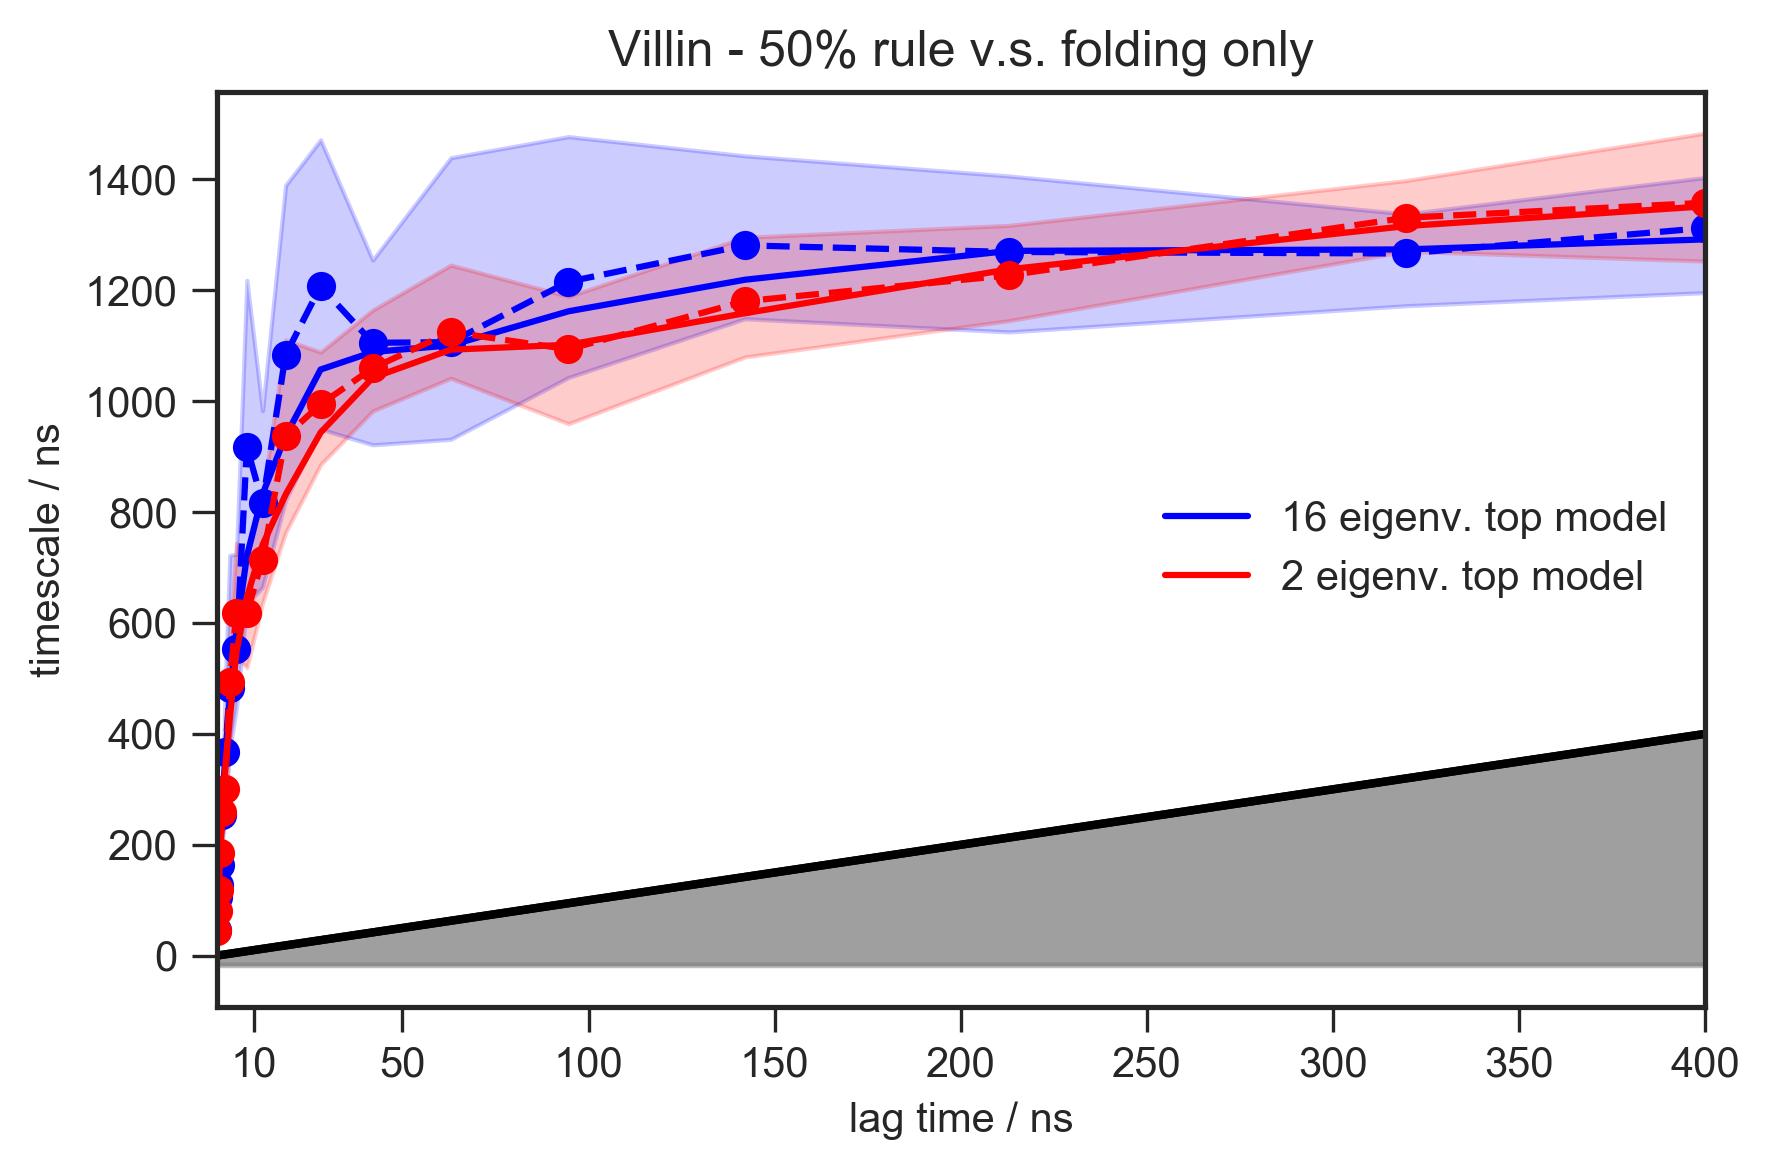

In [54]:
plt.figure(dpi=300)
plot_implied_timescales(its, ylog=False, dt=0.2, units='ns', nits=1, show_mean=True, label='16 eigenv. top model')
plot_implied_timescales(its_2eigen, ylog=False, dt=0.2, units='ns', nits=1, colors=['red'], show_mean=True, label='2 eigenv. top model')
plt.legend(loc='center right')
#plt.axvline(10, c='red')
plt.title('Villin - 50% rule v.s. folding only')
plt.xticks([10,50,100,150,200,250,300,350,400])
plt.tight_layout()
plt.savefig('villin_its_lag10ns_diffeigen.png', dpi=300)
plt.savefig('villin_its_lag10ns_diffeigen.pdf')

In [15]:
# 2 eigen CK-test

In [18]:
# lag 10 ns

In [33]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 50)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [34]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (150/10)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

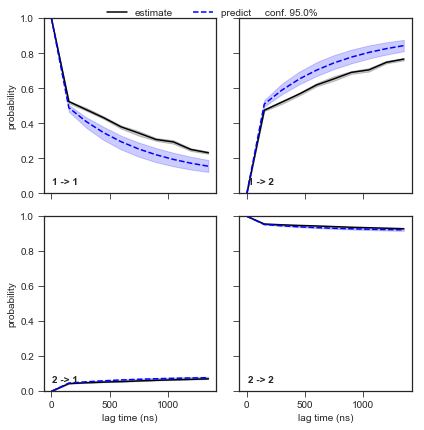

In [35]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('villin_cktest_lag10ns_outto1350ns_2eigen.png', dpi=300)
plt.savefig('villin_cktest_lag10ns_outto1350ns_2eigen.pdf')

In [22]:
# lag 50 ns

In [23]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 250)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [24]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (150/50)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

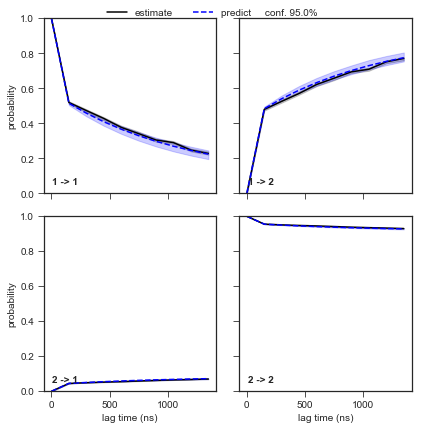

In [25]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('villin_cktest_lag50ns_outto1350ns_2eigen.png', dpi=300)
plt.savefig('villin_cktest_lag50ns_outto1350ns_2eigen.pdf')

In [ ]:
# lag 100 ns

In [36]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 500)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [37]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (150/100)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

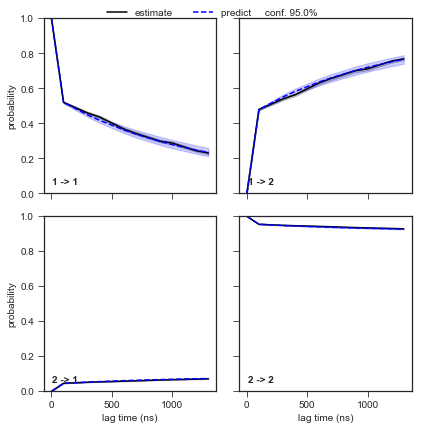

In [38]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('villin_cktest_lag100ns_outto1350ns_2eigen.png', dpi=300)
plt.savefig('villin_cktest_lag100ns_outto1350ns_2eigen.pdf')

In [39]:
# lag 150 ns

In [40]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 750)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [41]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (150/150)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

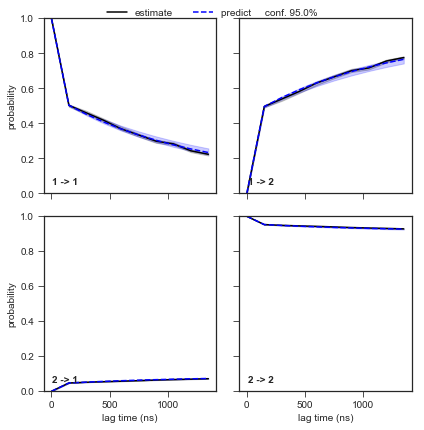

In [42]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('villin_cktest_lag150ns_outto1350ns_2eigen.png', dpi=300)
plt.savefig('villin_cktest_lag150ns_outto1350ns_2eigen.pdf')

In [1]:
#######################
# assign microstates to folded and unfolded based on PCCA macrostates
# let's look at lag time at which CK-test is first passed

In [94]:
import pyemma
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import numpy as np
from glob import glob

In [95]:
dtrajs = list(np.load('dtrajs_villin_lag10ns.npy'))

In [96]:
# 50 ns

In [ ]:
# 2 states

In [141]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 250)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [142]:
pcca = bmsm.pcca(2)

In [143]:
pcca.coarse_grained_stationary_probability

array([ 0.08767305,  0.91232695])

In [144]:
# hypothesis: 0 is folded, 1 is unfolded WRONG

In [ ]:
# it appears hypotheses were wrong - 0 is misfolded, 1 is folded, 2 is unfolded (in two state 0 is misfolded, 
# 1 is folded-unfolded)

In [145]:
bmsm.metastable_sets

[array([ 2, 22, 23, 37, 38, 54, 58, 80, 81]),
 array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56,
        57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
        75, 76, 77, 78, 79, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,
        94, 95, 96, 97, 98, 99])]

In [148]:
meta_sets = bmsm.metastable_sets

In [105]:
np.save('villin_lag50ns_metastable_sets_2states', bmsm.metastable_sets)

In [101]:
meta_membs_2 = bmsm.metastable_memberships

In [106]:
np.save('villin_lag50ns_metastable_memberships_2states', bmsm.metastable_memberships)

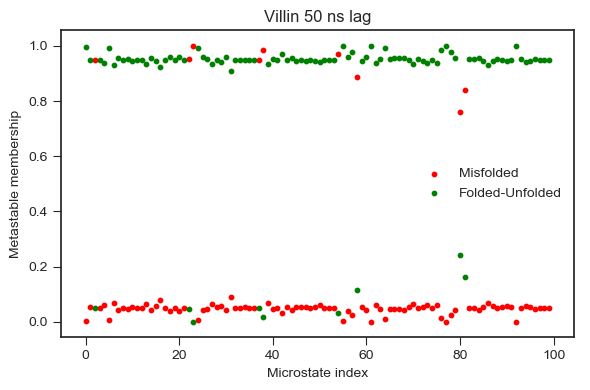

In [288]:
plt.figure(dpi=100)
plt.scatter(range(100), meta_membs_2[:,0], color='red', s=10, label='Misfolded')
plt.scatter(range(100), meta_membs_2[:,1], color='green', s=10, label='Folded-Unfolded')
plt.xlabel('Microstate index')
plt.ylabel('Metastable membership')
plt.title('Villin 50 ns lag')
plt.legend()
plt.tight_layout()
plt.savefig('villin_lag50ns_metastable_membs_2states.png', dpi=300)
plt.show()

In [139]:
# look at trajectories to confirm 2 macro assignments

In [149]:
dtrajs_macro = []

for state in dtrajs[0]:
    if state in meta_sets[0]:
        dtrajs_macro.append(0)
    elif state in meta_sets[1]:
        dtrajs_macro.append(1)
    elif state in meta_sets[2]:
        dtrajs_macro.append(2)

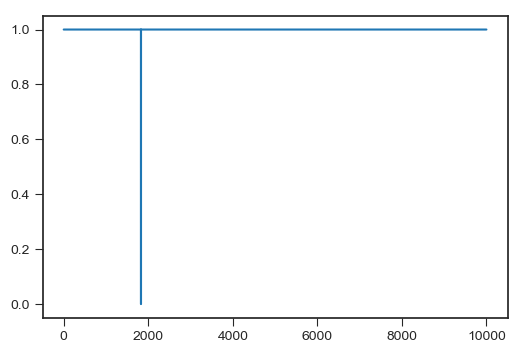

In [150]:
plt.figure(dpi=100)
plt.plot(np.array(dtrajs_macro)[:10000])
plt.show()

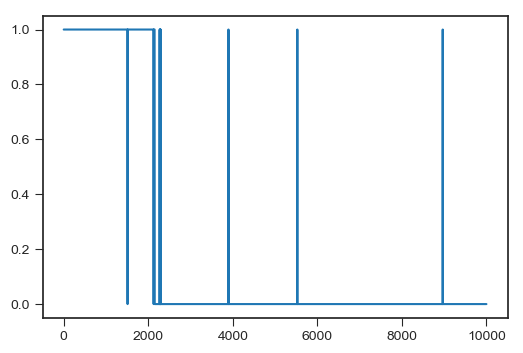

In [152]:
plt.figure(dpi=100)
plt.plot(np.array(dtrajs_macro)[300000:310000])
plt.show()

In [47]:
plt.figure(dpi=100)
plt.plot(np.array(dtrajs_macro)[::1000])
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'aplot'

In [102]:
# meta_membs_diff = []

# for state in bmsm.metastable_memberships:
#     meta_membs_diff.append(np.abs(state[0]-state[1]))
    
# meta_membs_diff_belowp8 = []

# for i in range(len(meta_membs_diff)):
#     if meta_membs_diff[i] < 0.8:
#         meta_membs_diff_belowp8.append(i)

In [103]:
# plt.figure()
# plt.plot(meta_membs_diff)
# plt.xticks(meta_membs_diff_belowp8, rotation=90)
# plt.xlabel('Microstate index')
# plt.ylabel('abs(folded - unfolded) metastable membership')
# plt.title('Villin')
# plt.axhline(0.8, color='red')
# plt.tight_layout()
# #plt.savefig('villin_lag10ns_metastable_memberships.png', dpi=300)
# plt.show()

In [16]:
# 3 states

In [290]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 250)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [292]:
pcca = bmsm.pcca(3)

In [293]:
pcca.coarse_grained_stationary_probability

array([ 0.05714399,  0.33084333,  0.61201268])

In [308]:
# WRONG hypothesis: 0 is folded, 1 is intermediate, 2 is unfolded WRONG

In [307]:
# it appears hypotheses were wrong - 0 is misfolded, 1 is folded, 2 is unfolded (in two state 0 is misfolded, 
# 1 is folded-unfolded)

In [ ]:
# MFPTs

In [ ]:
# misfolded --> folded

In [296]:
bmsm.mfpt(bmsm.metastable_sets[0], bmsm.metastable_sets[1]) * 0.2 * 1/1000 # in microseconds

2.824610758764071

In [ ]:
# folded --> misfolded

In [298]:
bmsm.mfpt(bmsm.metastable_sets[1], bmsm.metastable_sets[0]) * 0.2 * 1/1000 # in microseconds

19.040081320079835

In [ ]:
# unfolded --> folded

In [297]:
bmsm.mfpt(bmsm.metastable_sets[2], bmsm.metastable_sets[1]) * 0.2 * 1/1000 # in microseconds

1.6446859340529025

In [ ]:
# folded --> unfolded

In [299]:
bmsm.mfpt(bmsm.metastable_sets[1], bmsm.metastable_sets[2]) * 0.2 * 1/1000 # in microseconds

0.56931728939276249

In [ ]:
# unfolded --> misfolded

In [300]:
bmsm.mfpt(bmsm.metastable_sets[2], bmsm.metastable_sets[0]) * 0.2 * 1/1000 # in microseconds

18.407859858320283

In [ ]:
# misfolded --> unfolded

In [301]:
bmsm.mfpt(bmsm.metastable_sets[0], bmsm.metastable_sets[2]) * 0.2 * 1/1000 # in microseconds

1.1494359732681312

In [ ]:
################

In [ ]:
# now look at just two sets - 'right' (mis and un - folded) and 'wrong' (mis - unfolded and folded)

In [ ]:
# RIGHT

In [302]:
# misfolded and unfolded --> folded

In [305]:
bmsm.mfpt(np.concatenate([bmsm.metastable_sets[0], bmsm.metastable_sets[2]]), bmsm.metastable_sets[1])  * 0.2 * 1/1000 # in microseconds

1.7306576684140758

In [ ]:
# folded --> misfolded and unfolded

In [306]:
bmsm.mfpt(bmsm.metastable_sets[1], np.concatenate([bmsm.metastable_sets[0], bmsm.metastable_sets[2]]))  * 0.2 * 1/1000 # in microseconds

0.56914590118634611

In [ ]:
# WRONG

In [ ]:
# misfolded --> unfolded and folded

In [309]:
bmsm.mfpt(bmsm.metastable_sets[0], np.concatenate([bmsm.metastable_sets[1], bmsm.metastable_sets[2]]))  * 0.2 * 1/1000 # in microseconds

1.1486648312357792

In [ ]:
# unfolded and folded --> misfolded

In [310]:
bmsm.mfpt(np.concatenate([bmsm.metastable_sets[1], bmsm.metastable_sets[2]]), bmsm.metastable_sets[0])  * 0.2 * 1/1000 # in microseconds

18.573016230293412

In [163]:
bmsm.metastable_sets

[array([ 2, 22, 23, 37, 38, 54, 58, 80, 81]),
 array([ 0,  5, 24, 55, 57, 61, 64, 76, 77, 78, 92]),
 array([ 1,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 39, 40, 41,
        42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 56, 59, 60, 62, 63,
        65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79, 82, 83, 84, 85, 86,
        87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99])]

In [164]:
meta_membs_3 = bmsm.metastable_memberships

In [165]:
np.save('villin_lag50ns_metastable_memberships_3states', bmsm.metastable_memberships)

In [166]:
meta_sets = bmsm.metastable_sets

In [167]:
np.save('villin_lag50ns_metastable_sets_3states', bmsm.metastable_sets)

In [8]:
#meta_sets = np.load('villin_lag50ns_metastable_sets_3states.npy')

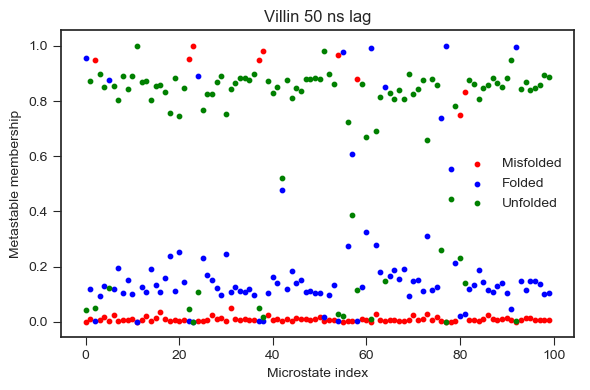

In [289]:
plt.figure(dpi=100)
plt.scatter(range(100), meta_membs_3[:,0], color='red', s=10, label='Misfolded')
plt.scatter(range(100), meta_membs_3[:,1], color='blue', s=10, label='Folded')
plt.scatter(range(100), meta_membs_3[:,2], color='green', s=10, label='Unfolded')
plt.xlabel('Microstate index')
plt.ylabel('Metastable membership')
plt.title('Villin 50 ns lag')
plt.legend()
plt.tight_layout()
plt.savefig('villin_lag50ns_metastable_membs_3states.png', dpi=300)
plt.show()

In [118]:
# meta_membs_diff = []

# for state in bmsm.metastable_memberships:
#     diffs = [np.abs(state[0]-state[1]), np.abs(state[0]-state[2]), np.abs(state[1]-state[2])]
#     meta_membs_diff.append(np.max(diffs))
    
# meta_membs_diff_belowp8 = []

# for i in range(len(meta_membs_diff)):
#     if meta_membs_diff[i] < 0.8:
#         meta_membs_diff_belowp8.append(i)

In [119]:
# plt.figure()
# plt.plot(meta_membs_diff)
# plt.xticks(meta_membs_diff_belowp8, rotation=90)
# plt.xlabel('Microstate index')
# plt.ylabel('abs(folded - unfolded) metastable membership')
# plt.title('Villin')
# plt.axhline(0.8, color='red')
# plt.tight_layout()
# #plt.savefig('villin_lag10ns_metastable_memberships.png', dpi=300)
# plt.show()

In [26]:
# look at trajectories to confirm 3 macro assignments

In [10]:
dtrajs_macro = []

for state in dtrajs[0]:
    if state in meta_sets[0]:
        dtrajs_macro.append(0)
    elif state in meta_sets[1]:
        dtrajs_macro.append(1)
    elif state in meta_sets[2]:
        dtrajs_macro.append(2)

In [169]:
len(dtrajs[0])

627907

In [11]:
len(dtrajs_macro)

627907

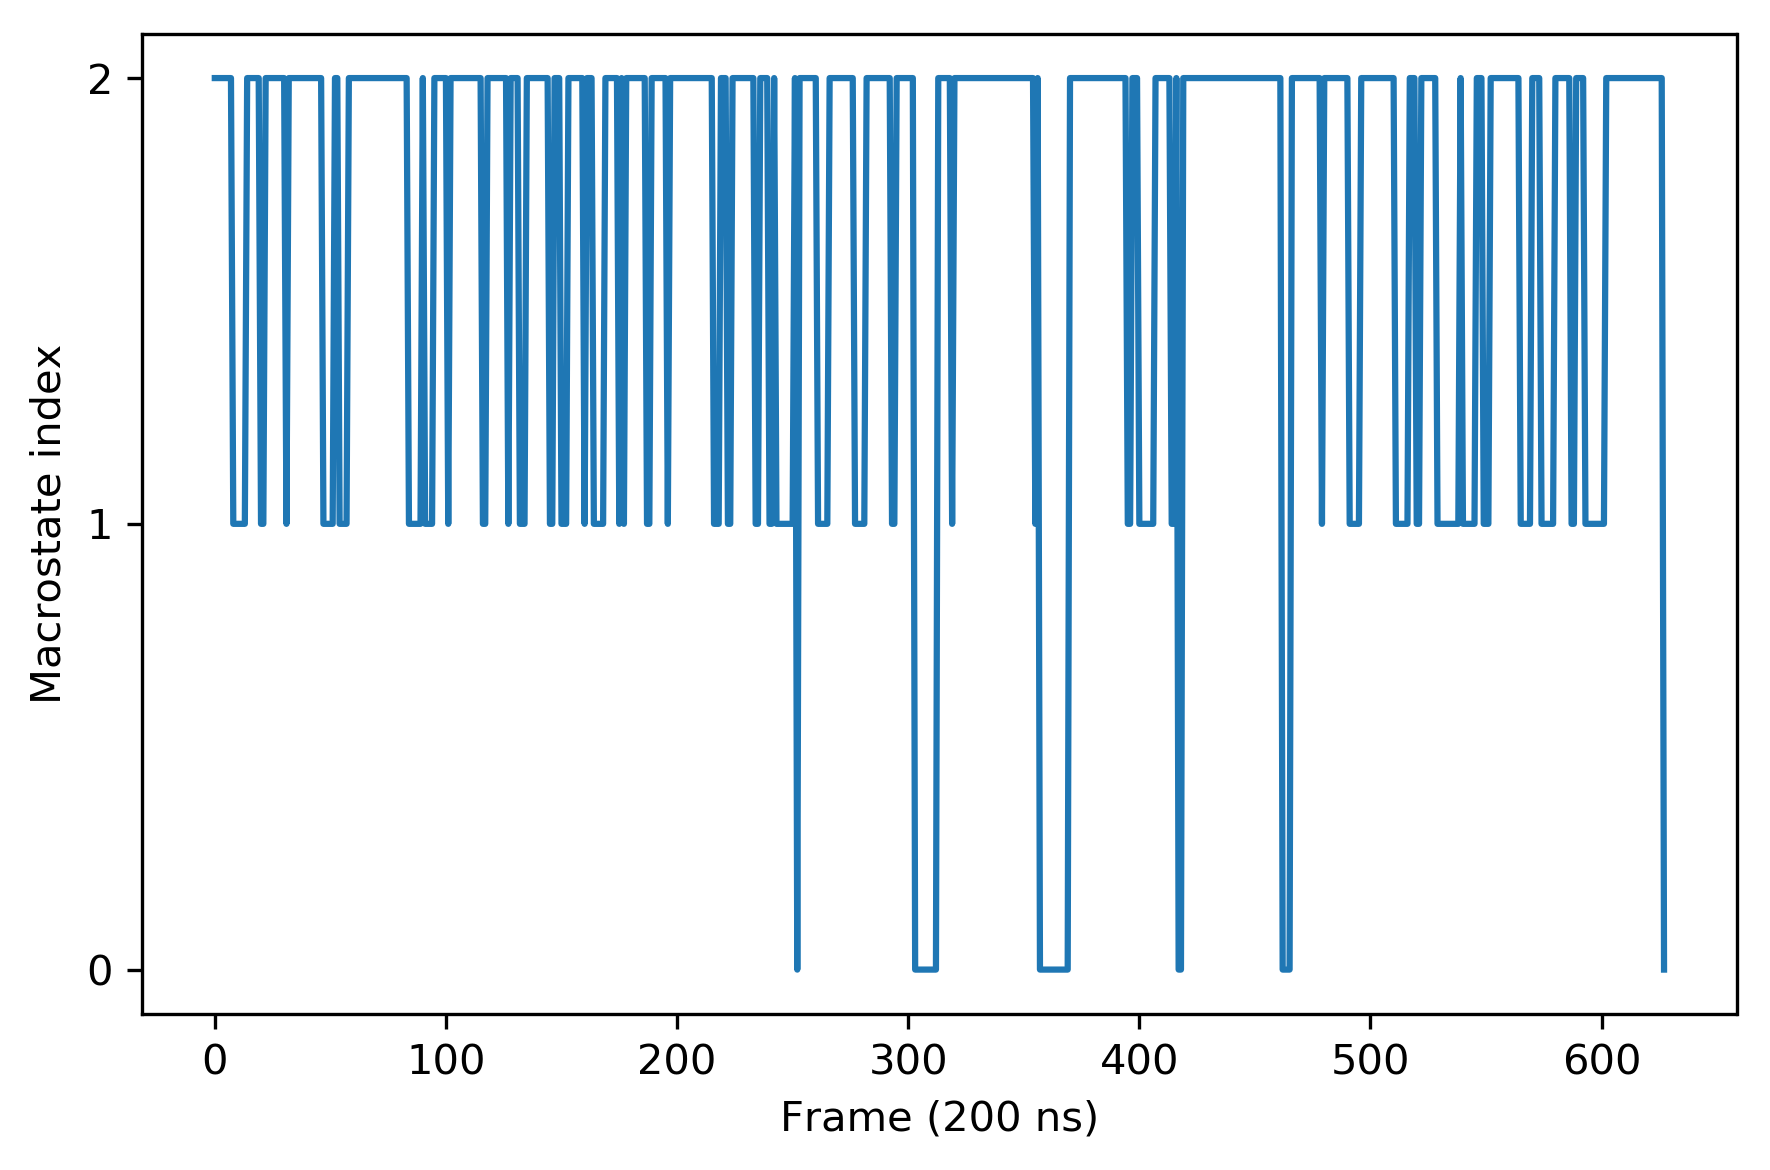

In [139]:
plt.figure(dpi=300)
plt.plot(np.array(dtrajs_macro)[::1000])
plt.xlabel('Frame (200 ns)')
plt.ylabel('Macrostate index')
plt.yticks([0,1,2])
plt.tight_layout()
plt.savefig('villin_macro_dtraj.png', dpi=300)
plt.show()

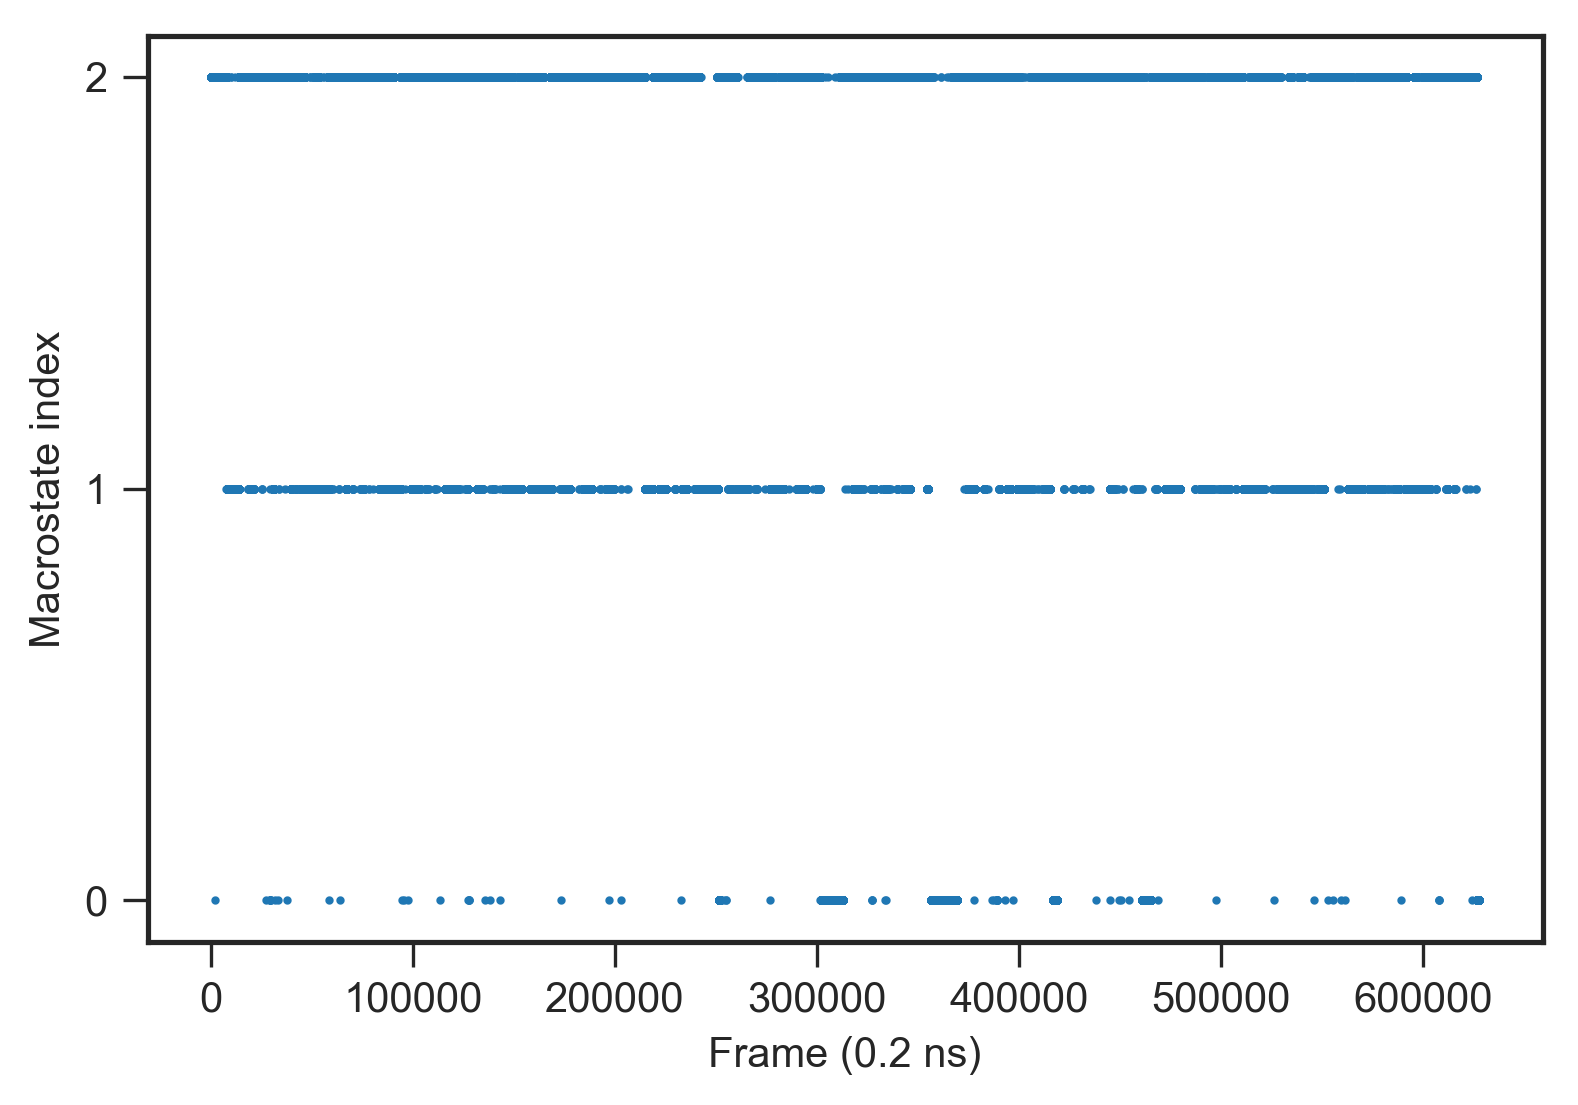

In [55]:
plt.figure(dpi=300)
plt.scatter(range(len(dtrajs_macro)),np.array(dtrajs_macro), s=1)
plt.xlabel('Frame (0.2 ns)')
plt.ylabel('Macrostate index')
plt.yticks([0,1,2])
plt.show()

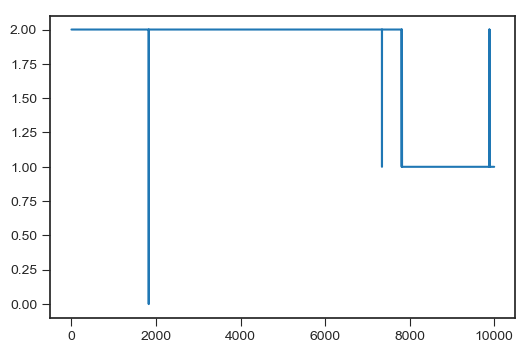

In [172]:
plt.figure(dpi=100)
plt.plot(np.array(dtrajs_macro)[:10000])
plt.show()

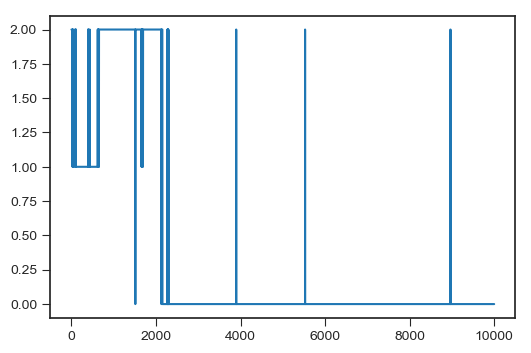

In [173]:
plt.figure(dpi=100)
plt.plot(np.array(dtrajs_macro)[300000:310000])
plt.show()

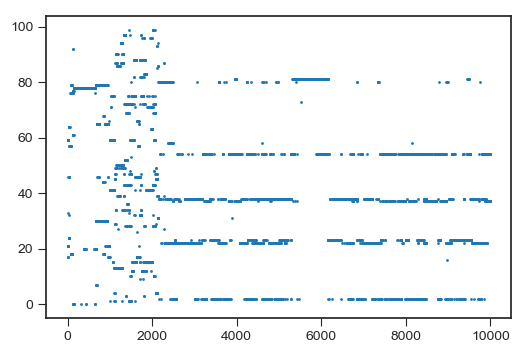

In [255]:
plt.figure(dpi=100)
plt.scatter(range(len(dtrajs[0][300000:310000])), dtrajs[0][300000:310000], s=1)
plt.show()

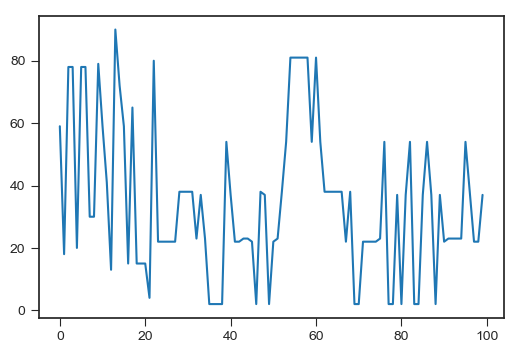

In [259]:
plt.figure(dpi=100)
plt.plot(dtrajs[0][300000:310000:100])
plt.show()

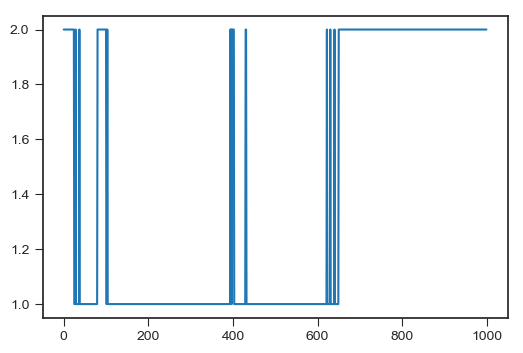

In [192]:
plt.figure(dpi=100)
plt.plot(np.array(dtrajs_macro)[300000:301000])
plt.show()

In [177]:
# it appears hypotheses were wrong - 0 is misfolded, 1 is folded, 2 is unfolded (in two state 0 is misfolded, 
# 1 is folded-unfolded)

In [193]:
# this seems correct from visual analysis of the 0 and 30 trajectory shards (macrostate dtrajs above -
# 0 is unfold --> fold, 1 is (unfold--fold) --> misfold)

In [194]:
# confirm this by looking at RMSD to folded and radius of gyration

In [196]:
# did it in ipython for some reason... just loading in here

In [244]:
rmsd_0 = np.load('rmsd_0.npy')
rmsd_30 = np.load('rmsd_30.npy')

rg_0 = np.load('rg_0.npy')
rg_30 = np.load('rg_30.npy')

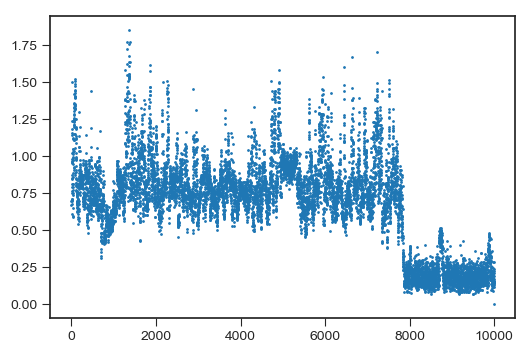

In [283]:
plt.figure(dpi=100)
plt.scatter(range(len(rmsd_0)),rmsd_0, s=1)
plt.show()

In [265]:
# moving_avg = pandas.rolling_mean(rmsd_0, 500)

# plt.figure(dpi=100)
# plt.plot(moving_avg)
# plt.show()

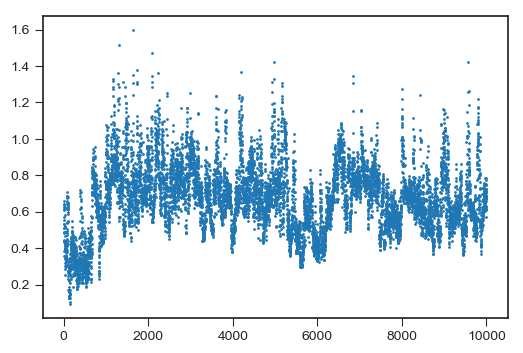

In [284]:
plt.figure(dpi=100)
plt.scatter(range(len(rmsd_30)),rmsd_30, s=1)
plt.show()

In [264]:
# moving_avg = pandas.rolling_mean(rmsd_30, 500)

# plt.figure(dpi=100)
# plt.plot(moving_avg)
# plt.show()

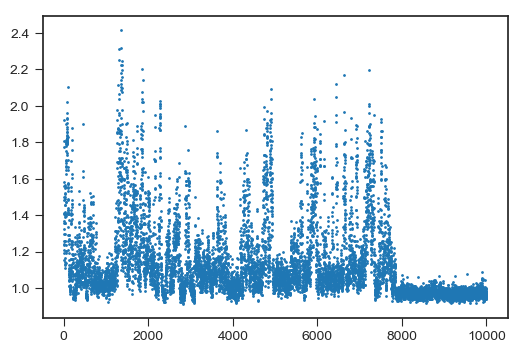

In [213]:
plt.figure(dpi=100)
plt.scatter(range(len(rg_0)), rg_0, s=1)
plt.show()

In [214]:
# let's do moving average too

In [215]:
import pandas

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  """Entry point for launching an IPython kernel.


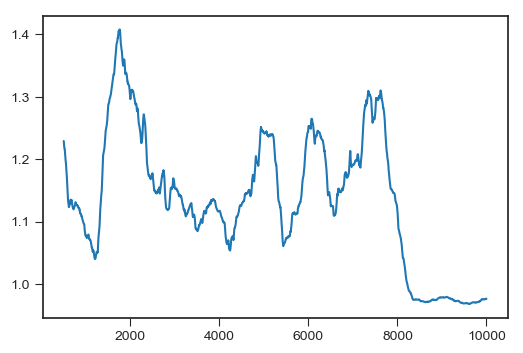

In [250]:
moving_avg = pandas.rolling_mean(rg_0, 500)

plt.figure(dpi=100)
plt.plot(moving_avg)
plt.show()

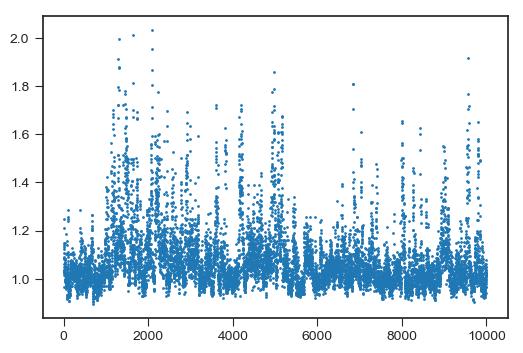

In [245]:
plt.figure(dpi=100)
plt.scatter(range(len(rg_30)), rg_30, s=1)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  """Entry point for launching an IPython kernel.


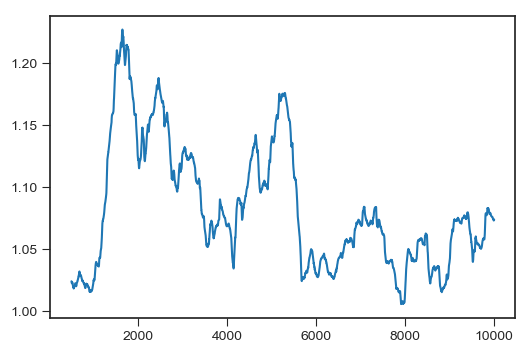

In [251]:
moving_avg = pandas.rolling_mean(rg_30, 500)

plt.figure(dpi=100)
plt.plot(moving_avg)
plt.show()

In [266]:
# let's have a look at other trajectories containing 0 too

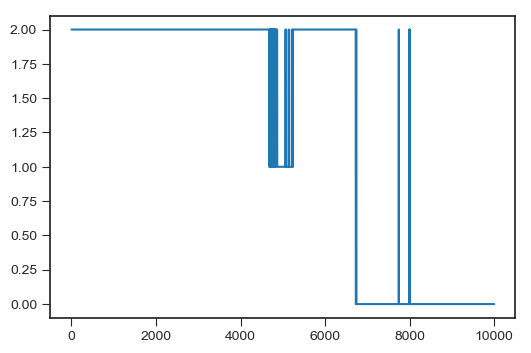

In [275]:
plt.figure(dpi=100)
plt.plot(np.array(dtrajs_macro)[350000:360000])
plt.show()

In [276]:
import mdtraj as md

In [279]:
traj_35 = md.load('2F4K-0-protein-035.dcd', top='villin.pdb')
folded = md.load("villin_folded.pdb")

In [280]:
rmsd_35 = md.rmsd(traj_35, folded, atom_indices=folded.top.select('name CA'))

In [281]:
rg_35 = md.compute_rg(traj_35)

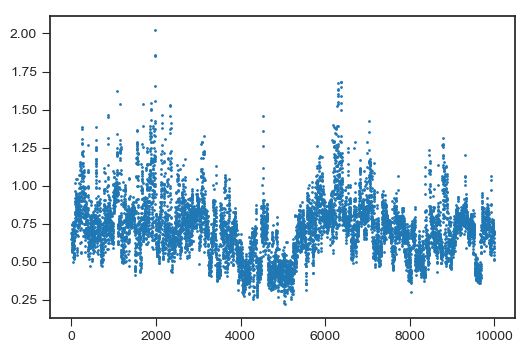

In [285]:
plt.figure(dpi=100)
plt.scatter(range(len(rmsd_35)),rmsd_35, s=1)
plt.show()

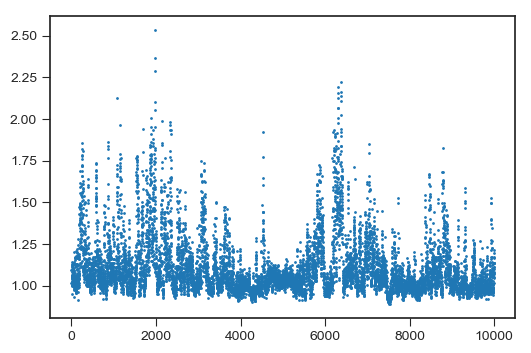

In [286]:
plt.figure(dpi=100)
plt.scatter(range(len(rg_35)),rg_35, s=1)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  """Entry point for launching an IPython kernel.


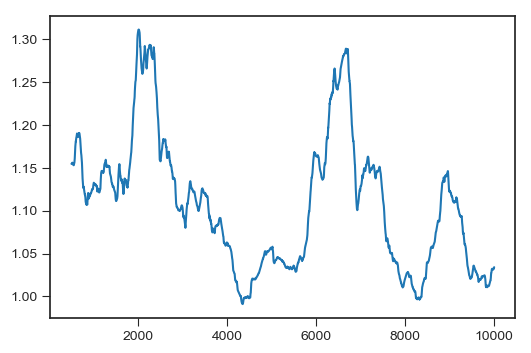

In [287]:
moving_avg = pandas.rolling_mean(rg_35, 500)

plt.figure(dpi=100)
plt.plot(moving_avg)
plt.show()

In [312]:
# let's have a look at whole trajectory RMSD to folded v.s. macrostate index - can we see the misfolded state by RMSD?
# also draw say 25 frames per each of the 3 macrostates and make figures

In [1]:
# let's draw 100 frames from each unfolded - folded - misfolded

In [21]:
np.random.choice(np.concatenate(np.argwhere(np.array(dtrajs_macro)==0)), 100)

array([361503, 307035, 627570, 360530, 312650, 627173, 305221, 363764,
       464636, 311828, 305661, 361967, 312161, 366054, 461635, 365550,
       304206, 461359, 304000, 357377, 306725, 418093, 306069, 464242,
       464613, 418907, 418858, 357125, 308669, 309525, 308675, 416905,
       304490, 359667, 306441, 302267, 365120, 359548, 252045, 308687,
       463308, 303925, 303308, 462285, 362406, 461739, 360662, 369254,
       304248, 364792, 302609, 463353, 362184, 358222, 368277, 356743,
       357192, 303973, 311974, 361298, 418684, 304952, 417138, 305435,
       368428, 359475, 366984, 367065, 366376, 464645, 309045, 308227,
       309008, 365183, 462825, 363140, 360068, 311794, 462845, 306269,
       365699, 368104, 307915, 364139, 304504, 303416, 364920, 417400,
       417217, 307718, 418432, 311856, 306122, 360050, 465304, 311579,
       308090, 417272, 251993, 304874])

In [23]:
# let's translate these to (shard, frame)

In [42]:
macrostate = 0

draw_dict = dict()
shards = []
frames = []

for frame in np.random.choice(np.concatenate(np.argwhere(np.array(dtrajs_macro)==macrostate)), 100):
    shard = int(frame/10000)
    shard_frame = frame - shard*10000
    if not shard in draw_dict:
        draw_dict[shard] = [shard_frame]
    else:
        draw_dict[shard].append(shard_frame)
        
for shard in draw_dict:
    shards.append(shard)
    frames.append(draw_dict[shard])
    
np.save('draw_shards_%d' % macrostate, shards) 
np.save('draw_frames_%d' % macrostate, frames) 

In [41]:
macrostate = 1

draw_dict = dict()
shards = []
frames = []

for frame in np.random.choice(np.concatenate(np.argwhere(np.array(dtrajs_macro)==macrostate)), 100):
    shard = int(frame/10000)
    shard_frame = frame - shard*10000
    if not shard in draw_dict:
        draw_dict[shard] = [shard_frame]
    else:
        draw_dict[shard].append(shard_frame)
        
for shard in draw_dict:
    shards.append(shard)
    frames.append(draw_dict[shard])
    
np.save('draw_shards_%d' % macrostate, shards) 
np.save('draw_frames_%d' % macrostate, frames) 

In [40]:
macrostate = 2

draw_dict = dict()
shards = []
frames = []

for frame in np.random.choice(np.concatenate(np.argwhere(np.array(dtrajs_macro)==macrostate)), 100):
    shard = int(frame/10000)
    shard_frame = frame - shard*10000
    if not shard in draw_dict:
        draw_dict[shard] = [shard_frame]
    else:
        draw_dict[shard].append(shard_frame)
        
for shard in draw_dict:
    shards.append(shard)
    frames.append(draw_dict[shard])
    
np.save('draw_shards_%d' % macrostate, shards) 
np.save('draw_frames_%d' % macrostate, frames) 

In [38]:
# ok going to make trajectories on lilac

In [39]:
pwd

'/Users/rafalpwiewiora/repos/msm-mfpt/vamp_scoring/automatic_eigenvalue/villin'

In [ ]:
# In [39]: frames_1 = np.load('draw_frames_1.npy')

# In [40]: shards_1 = np.load('draw_shards_1.npy')

# In [41]: frames = frames_1

# In [42]: shards = shards_1
    
# In [44]: traj_1 = md.load('villin.pdb')

# # In [33]: for i in range(len(shards)):
# #     ...:     frames_ = frames[i]
# #     ...:     if shards[i]/10 > 1:
# #     ...:         traj = md.load('2F4K-0-protein-0%d.dcd' % shards[i], top='villin.pdb')
# #     ...:     else:
# #     ...:         traj = md.load('2F4K-0-protein-00%d.dcd' % shards[i], top='villin.pdb')    
# #     ...:     for frame in frames_:
# #     ...:         traj_1 = traj_1.join(traj[frame])

In [56]:
# don't see any differences between misfolded and unfolded just looking
# let's do tICA and plot the landscape, see what the most correlated feature is

In [76]:
Y = np.concatenate(np.load('tica_Y.npy'))

In [58]:
correlations = np.load('tica_correlations.npy')

In [59]:
import msmexplorer

/anaconda3/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/

In [80]:
len(dtrajs[0])

627907

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


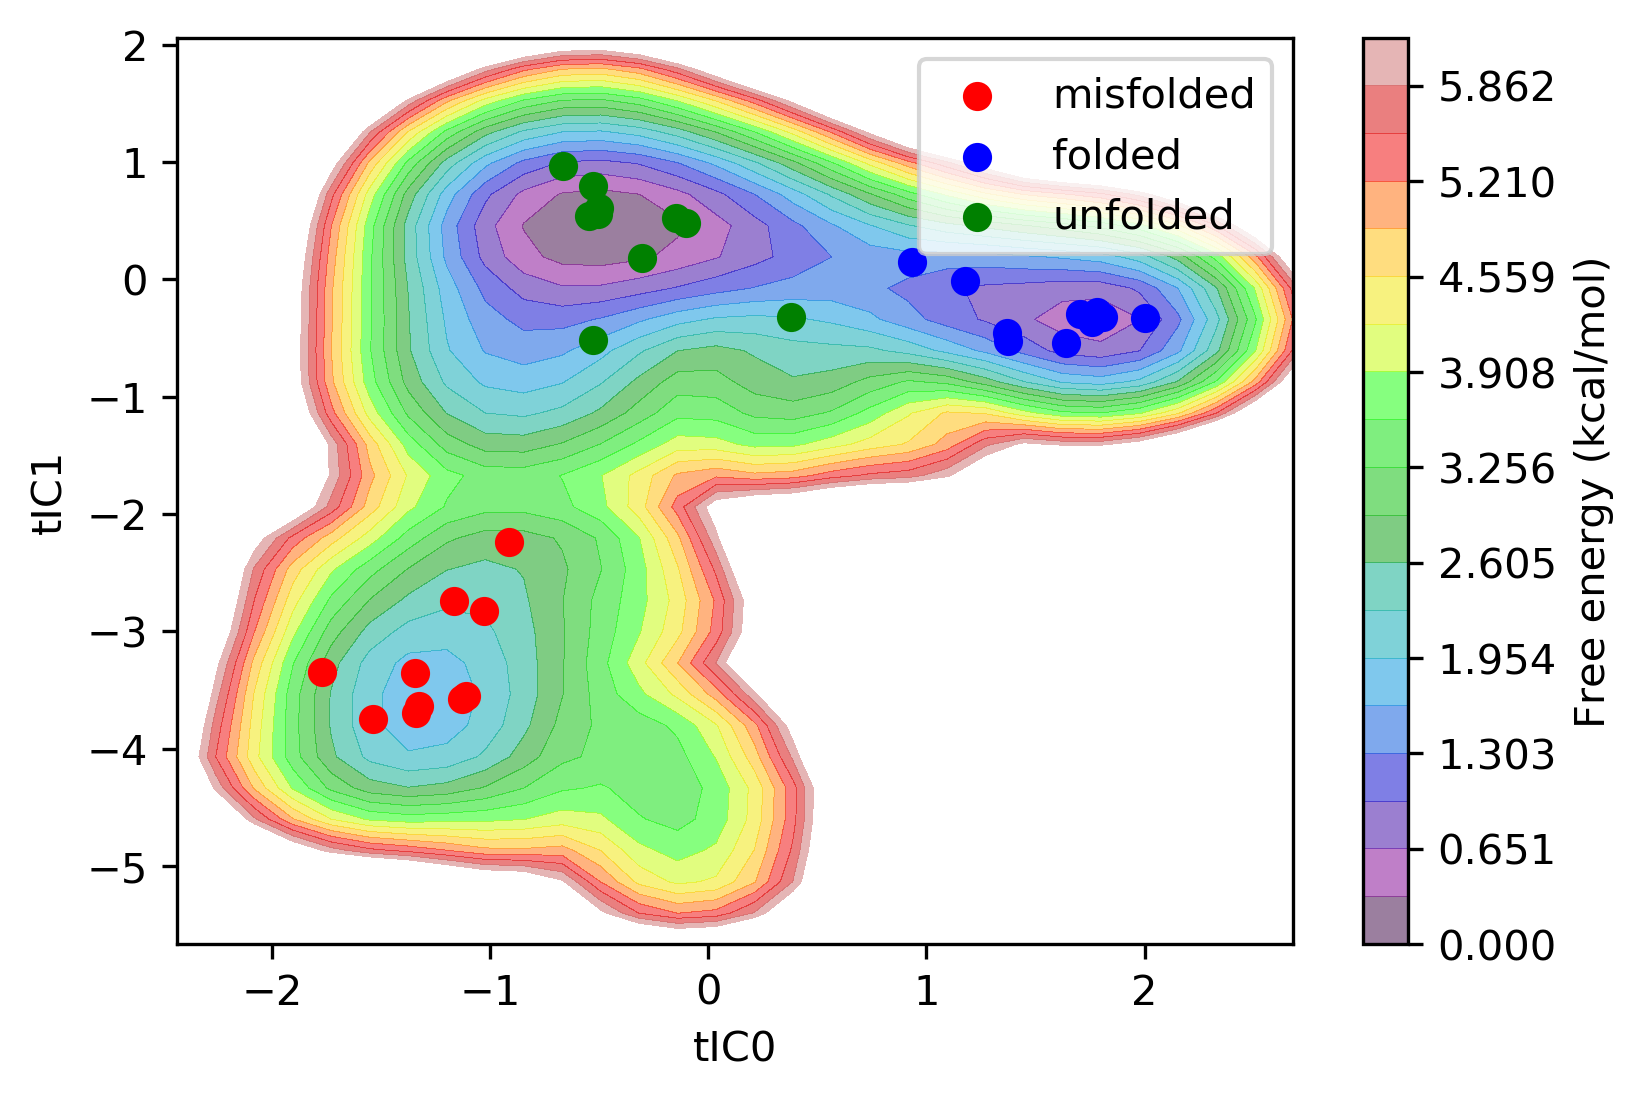

In [141]:
i=0
j=1

plot_data = msmexplorer.plot_free_energy(Y, obs=(i,j), cbar=True, return_data=True, n_samples=10000)
plt.close()

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1)
ax.grid(False)
ax.set_xlabel('tIC%d' % i)
ax.set_ylabel('tIC%d' % j)
vmin = -1E-12
vmax = np.percentile(plot_data[1][2], 50)
n_levels = 20
alpha = 0.5
im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                         levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                         zorder=1, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('Free energy (kcal/mol)')

draw_0 = np.random.choice(np.concatenate(np.argwhere(np.array(dtrajs_macro)==0)), 10)
draw_1 = np.random.choice(np.concatenate(np.argwhere(np.array(dtrajs_macro)==1)), 10)
draw_2 = np.random.choice(np.concatenate(np.argwhere(np.array(dtrajs_macro)==2)), 10)

plt.scatter(Y[draw_0,0], Y[draw_0,1], marker='o', c='red', label='misfolded')
plt.scatter(Y[draw_1,0], Y[draw_1,1], marker='o', c='blue', label='folded')
plt.scatter(Y[draw_2,0], Y[draw_2,1], marker='o', c='green', label='unfolded')

plt.legend()

plt.savefig('villin_tics_%d_%d.png' % (i,j), dpi=300)
plt.show()

In [113]:
# now feature - tic1 correlations

In [114]:
correlations.shape

(528, 10)

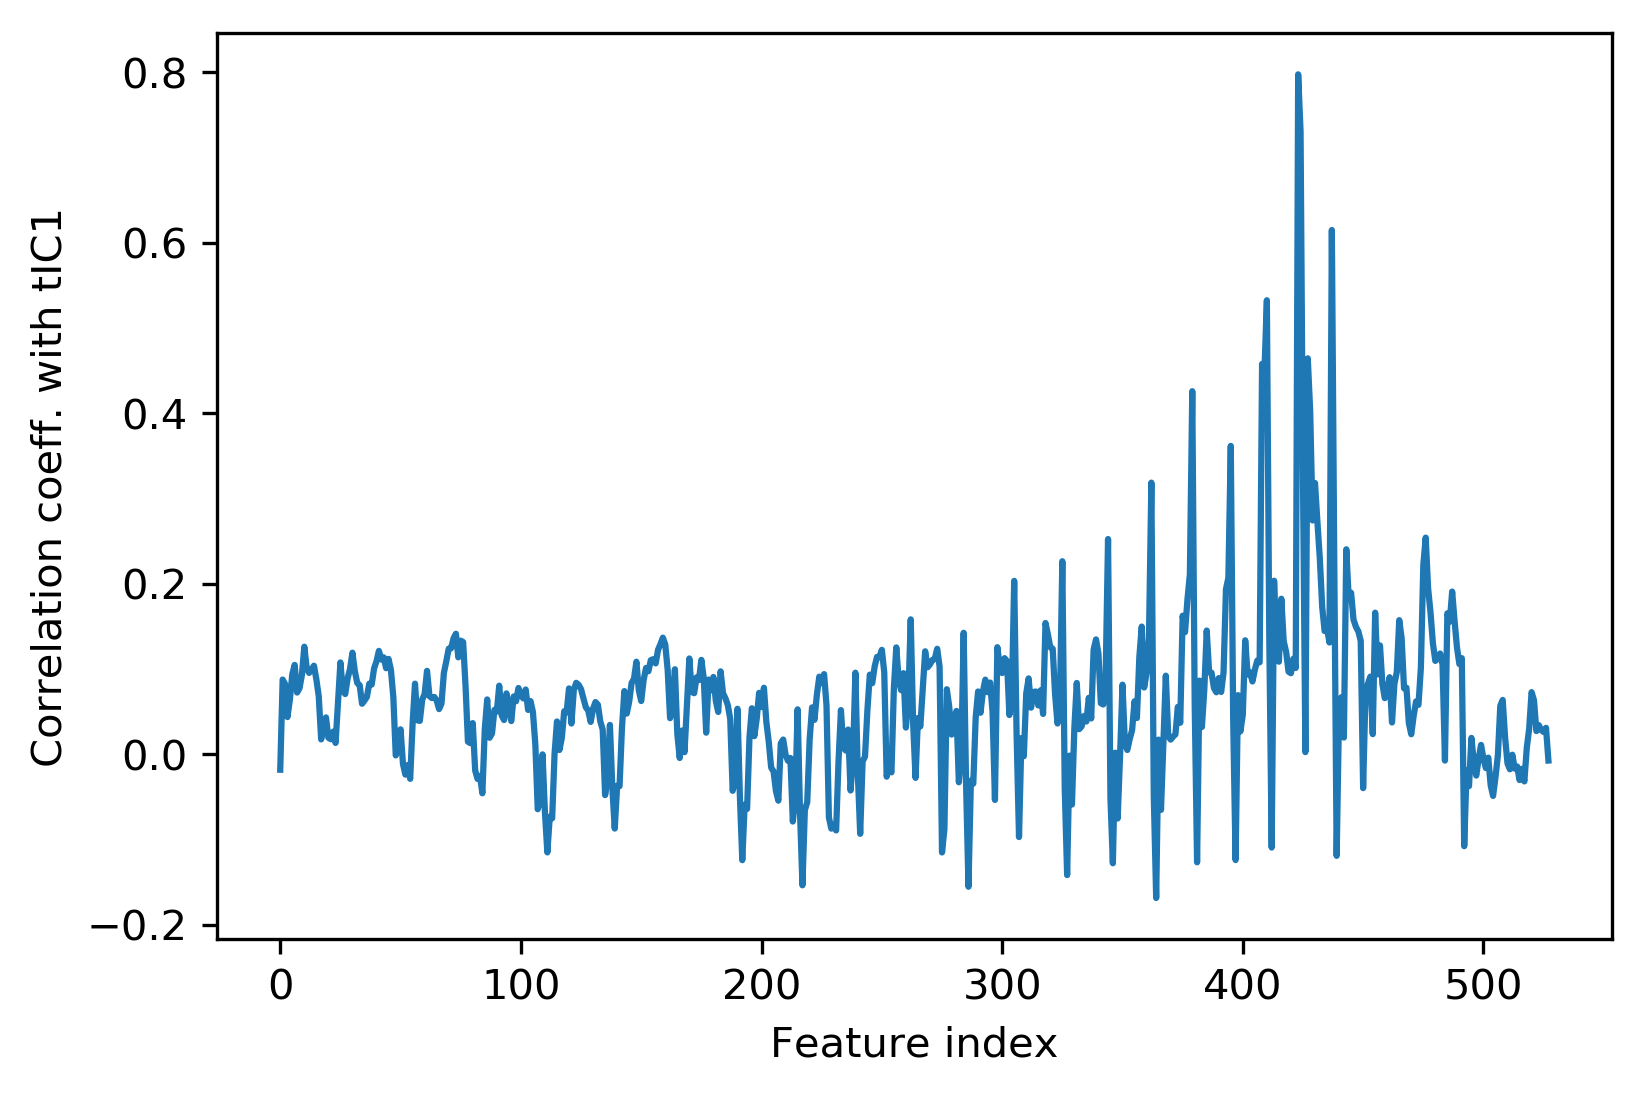

In [136]:
plt.figure(dpi=300)
plt.plot(correlations[:,1])
plt.xlabel('Feature index')
plt.ylabel('Correlation coeff. with tIC1')
plt.show()

In [115]:
tic1_corr = correlations[:,1]

In [116]:
np.argmax(np.abs(tic1_corr))

423

In [93]:
feat = pyemma.coordinates.featurizer('villin.pdb')

In [94]:
feat.add_residue_mindist()

18-09-18 22:44:52 pyemma.coordinates.data.featurization.featurizer.MDFeaturizer[0] WARNING  Using all residue pairs with schemes like closest or closest-heavy is very time consuming. Consider reducing the residue pairs


In [108]:
len(feat.describe())

528

In [117]:
feat.describe()[423]

'RES_DIST (closest-heavy) ASN60 - LEU63'

In [118]:
# let's calculate this distance in the whole trajectory and plot

In [119]:
feat423 = np.load('X_feat423.npy')

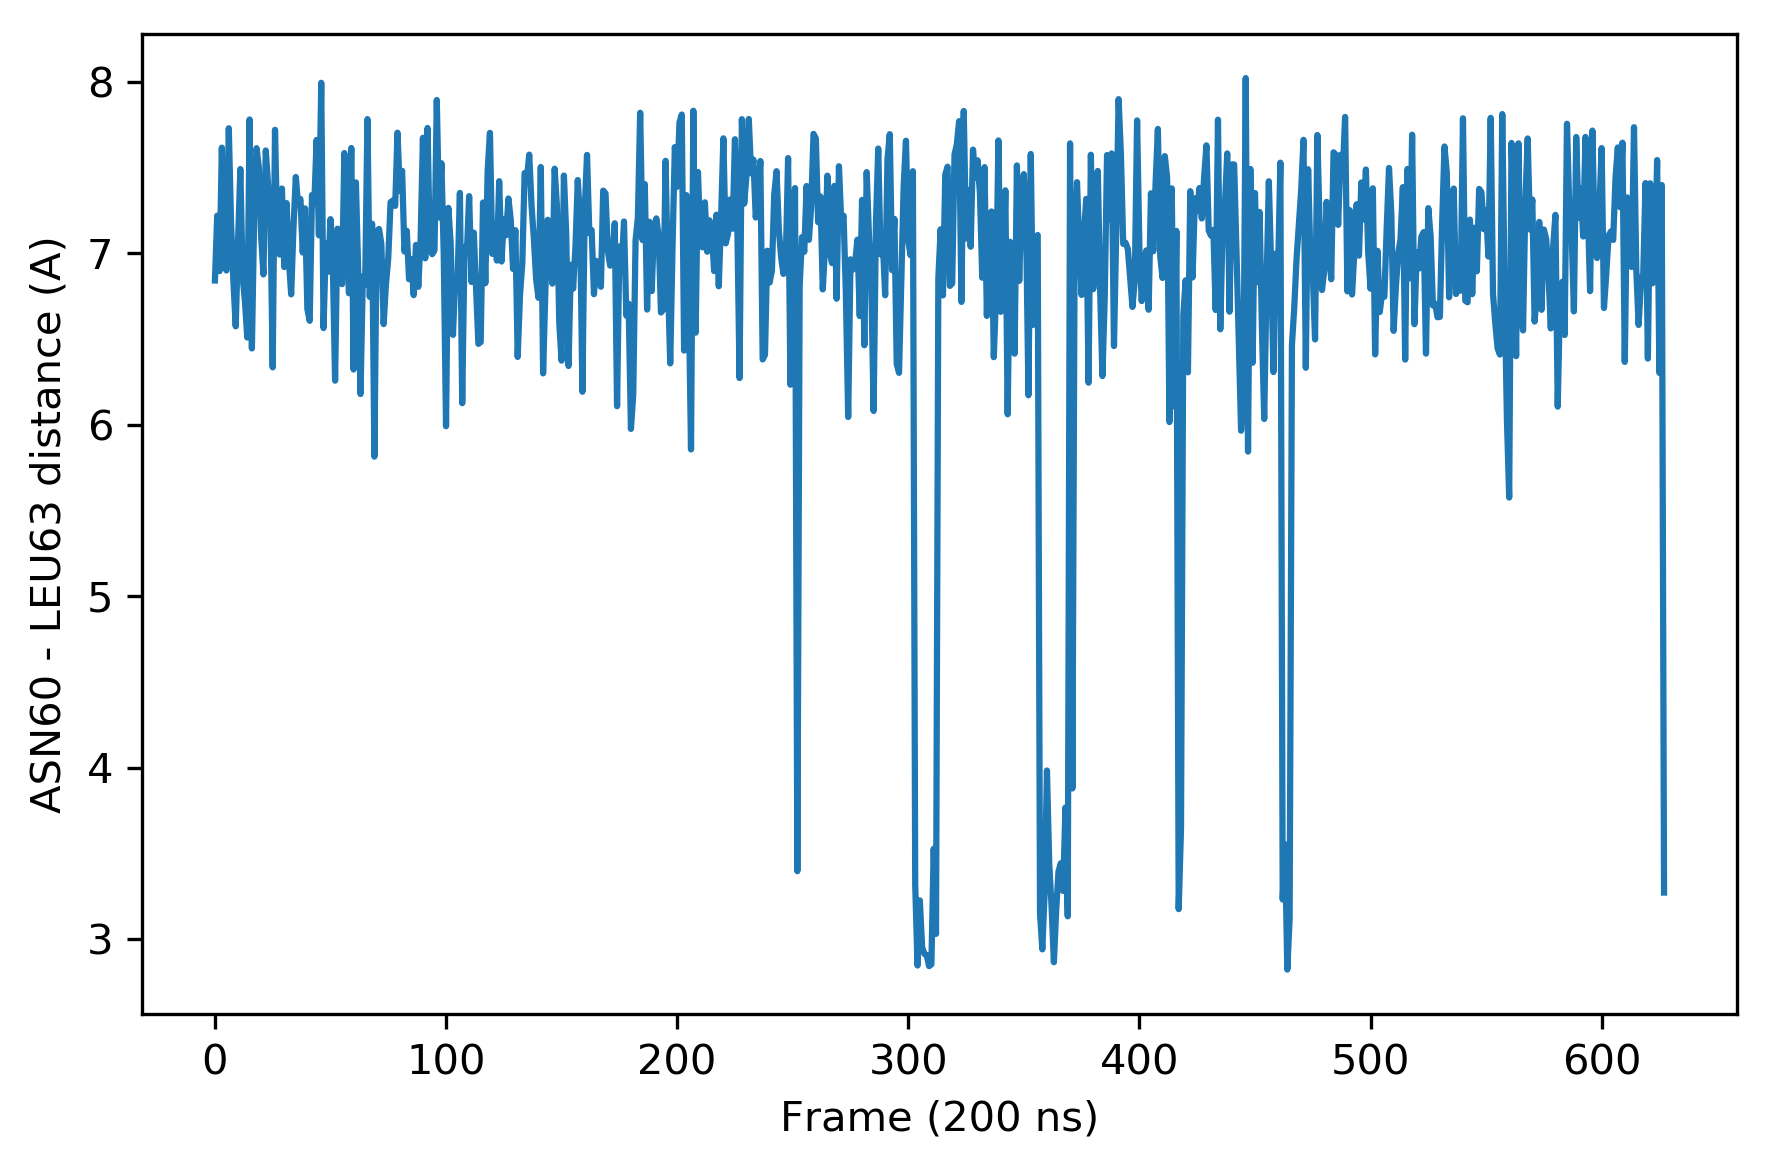

In [140]:
plt.figure(dpi=300)
plt.plot(10*feat423[::1000])
plt.xlabel('Frame (200 ns)')
plt.ylabel('ASN60 - LEU63 distance (A)')
plt.tight_layout()
plt.savefig('villin_asn60_leu63.png', dpi=300)
plt.show()

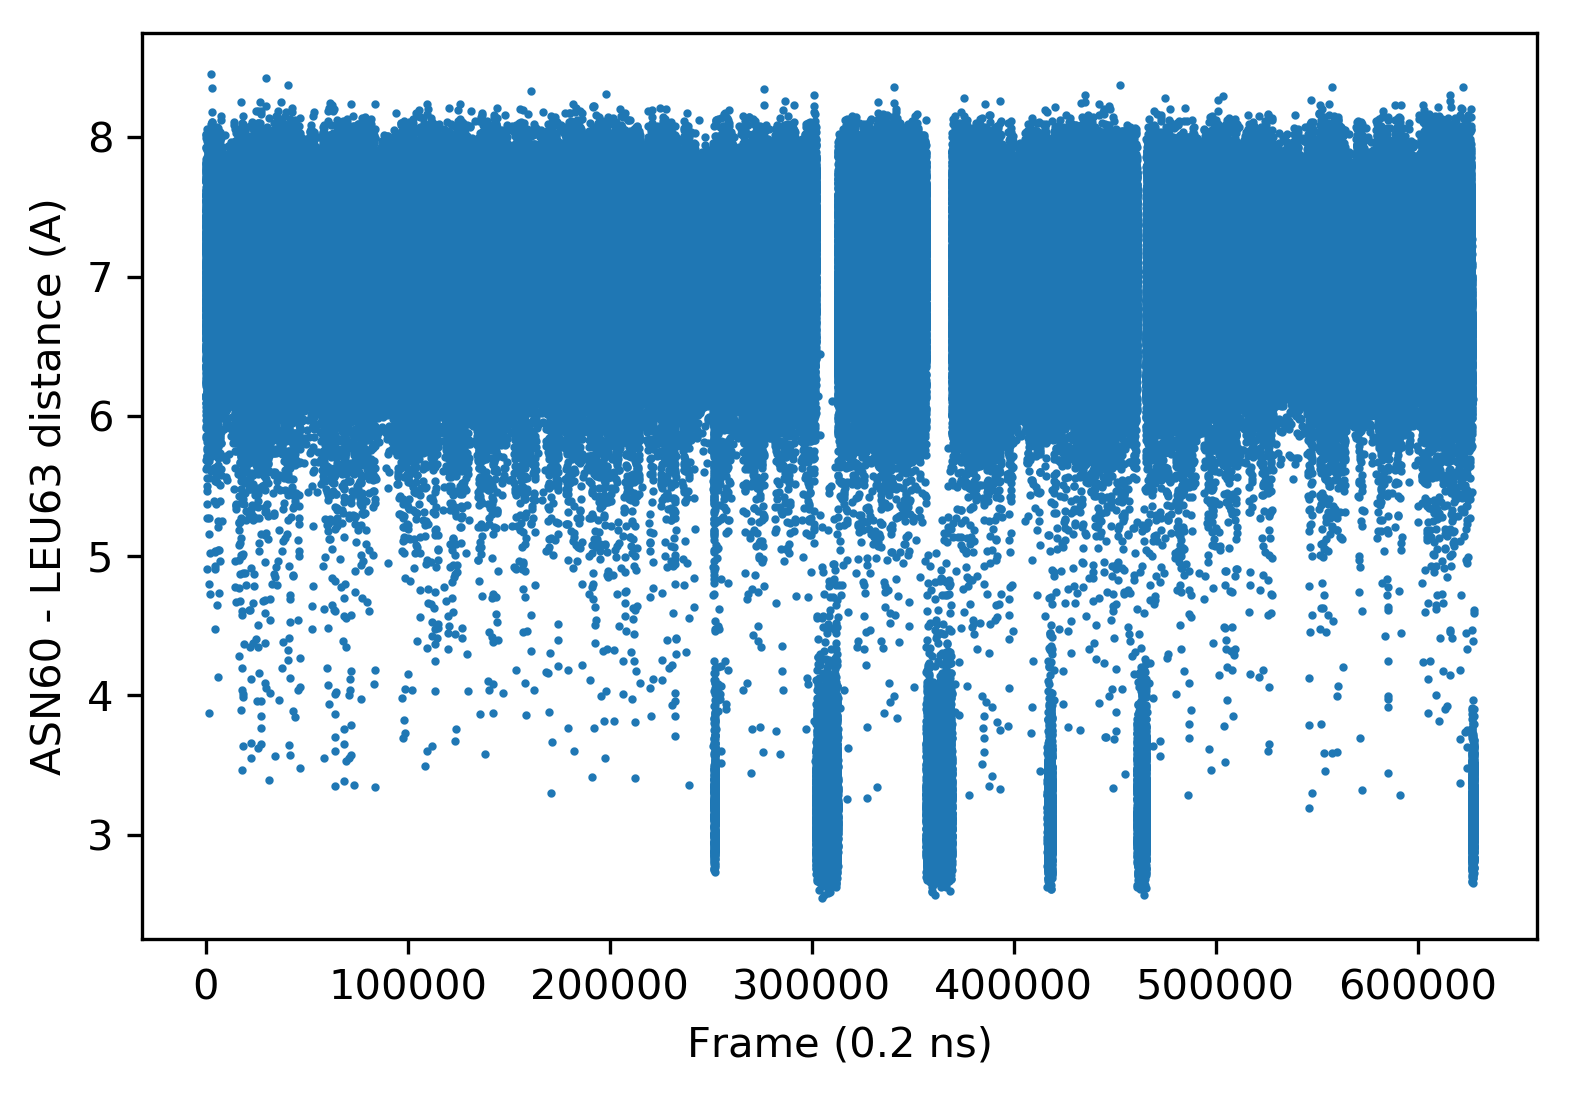

In [128]:
plt.figure(dpi=300)
plt.scatter(range(len(feat423)),np.array(10*feat423), s=1)
plt.xlabel('Frame (0.2 ns)')
plt.ylabel('ASN60 - LEU63 distance (A)')
plt.show()

In [130]:
# ok so this is real

In [132]:
msm = pyemma.msm.bayesian_markov_model(dtrajs, 250)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [135]:
msm.timescales()*0.2

array([ 1097.77719423,   434.51198352,   135.63054261,    90.08588278,
          67.2163014 ,    64.8049719 ,    61.55032541,    48.44448812,
          40.91520171,    38.36898597,    36.19590603,    33.6658758 ,
          31.45677594,    31.03537628,    29.86548532,    29.29023756,
          27.13007786,    25.75280006,    25.10105669,    23.90391892,
          23.05951541,    22.40898944,    21.16660877,    19.62036122,
          19.07037752,    18.91144894,    17.98215603,    17.79859892,
          17.63269593,    17.16227155,    17.09409774,    16.86458767,
          16.43899226,    16.3284105 ,    16.17883189,    15.80084502,
          15.70289107,    15.59916197,    15.53107363,    15.36823422,
          15.05129027,    14.90235554,    14.65473878,    14.55357471,
          14.30388476,    14.19599121,    14.16521489,    14.09829294,
          13.93432958,    13.82882265,    13.76091734,    13.51632541,
          13.41271938,    13.40802627,    13.19915235,    13.1832987 ,
      